https://www.youtube.com/playlist?list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4

# basic tensor operations

In [19]:
x1=torch.ones(5)
x2=torch.zeros(5)
x3=torch.empty(5)
x4=torch.ones(2,2)
x5=torch.ones(2,2,dtype=int)
x6=torch.tensor(((2,32),(9,8)))
x7=torch.tensor([[1,1,1,1],[2,2,2,2]])
x8=torch.rand(2,2)
x9=torch.rand((2,2))

x10=x8+x9 #element wise addition
x11=torch.add(x8,x9) #same thing
# x9.add_(x8) #directly change x9
#torch.mul, torch.div

x1,x2,x3,x4,x5,x6,x6.dtype,x6.size(),x7,x8,x9,x10,x11

(tensor([1., 1., 1., 1., 1.]),
 tensor([0., 0., 0., 0., 0.]),
 tensor([5.3925e-05, 1.0093e-08, 3.3423e+21, 1.7298e-04, 5.1203e-11]),
 tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1, 1],
         [1, 1]]),
 tensor([[ 2, 32],
         [ 9,  8]]),
 torch.int64,
 torch.Size([2, 2]),
 tensor([[1, 1, 1, 1],
         [2, 2, 2, 2]]),
 tensor([[0.4673, 0.7933],
         [0.7633, 0.3771]]),
 tensor([[0.3772, 0.9132],
         [0.7728, 0.5183]]),
 tensor([[0.8445, 1.7065],
         [1.5361, 0.8954]]),
 tensor([[0.8445, 1.7065],
         [1.5361, 0.8954]]))

In [23]:
y=torch.rand(5,5)
y[0],y[1][4],y[1][4].item()
#.item() only works single number

(tensor([0.0226, 0.8899, 0.6203, 0.8798, 0.9984]),
 tensor(0.4186),
 0.41856735944747925)

In [25]:
y=torch.rand(4,4)
y1=y.view(16) #resize
y2=y.view(-1,8) #resize auto infer
y,y1,y2

(tensor([[0.0558, 0.3922, 0.0359, 0.2533],
         [0.3143, 0.7484, 0.2311, 0.4839],
         [0.1126, 0.9465, 0.7140, 0.7436],
         [0.1543, 0.4583, 0.7420, 0.0141]]),
 tensor([0.0558, 0.3922, 0.0359, 0.2533, 0.3143, 0.7484, 0.2311, 0.4839, 0.1126,
         0.9465, 0.7140, 0.7436, 0.1543, 0.4583, 0.7420, 0.0141]),
 tensor([[0.0558, 0.3922, 0.0359, 0.2533, 0.3143, 0.7484, 0.2311, 0.4839],
         [0.1126, 0.9465, 0.7140, 0.7436, 0.1543, 0.4583, 0.7420, 0.0141]]))

In [28]:
a=torch.ones(5)
b=a.numpy()

c=np.zeros(5)
d=torch.from_numpy(c)

a,b,c,d
#if tensor if on cpu not gpu, b and a will share same memory location

(tensor([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.], dtype=float32),
 array([0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0.], dtype=torch.float64))

In [31]:
if torch.cuda.is_available():
    device=torch.device("cuda")
    x = torch.rand(5,device=device) #create tensor and put in the gpu
    #OR
    y=torch.rand(5)
    y=y.to(device)
    
    z=x+y
#     z1=z.numpy() #gives error since the tensors are in gpu -TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
    z=z.to("cpu")
    z1=z.numpy()
    
x,y,z,z1

(tensor([0.1717, 0.4682, 0.0842, 0.7341, 0.3245], device='cuda:0'),
 tensor([0.0531, 0.9398, 0.0120, 0.4765, 0.1442], device='cuda:0'),
 tensor([0.2247, 1.4080, 0.0962, 1.2106, 0.4687]),
 array([0.22470663, 1.4080207 , 0.09624222, 1.2105814 , 0.46870992],
       dtype=float32))

Torch.rand
torch.rand(*sizes, out=None) → Tensor returns a tensor containing a set of random numbers drawn from the uniform distribution in the interval [0,1), the shape is defined by the variable parameter sizes.

Torch.randn
torch.randn(*sizes, out=None) → Tensor returns a tensor, which contains a set of random numbers drawn from the standard normal distribution (mean value is 0, variance is 1, that is, Gaussian white noise), the shape is variable The parameter sizes are defined. parameter:

In [33]:
x=torch.rand(3)
x1=torch.randn(3)
x,x1

(tensor([0.9599, 0.4037, 0.8175]), tensor([-0.2976,  0.0937,  0.2589]))

# autograd 

https://www.youtube.com/watch?v=DbeIqrwb_dE&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=3&ab_channel=PatrickLoeber

requires_grad=True tells pytorch you need to calc the gradients for that variable in subsequent steps

In [46]:
x=torch.randn(3,requires_grad=True)
x

tensor([0.0233, 0.5397, 0.1355], requires_grad=True)

In [47]:
y=x+2
z=y*y*2
z=z.mean()

y,z

(tensor([2.0233, 2.5397, 2.1355], grad_fn=<AddBackward0>),
 tensor(10.0695, grad_fn=<MeanBackward0>))

In [48]:
z.backward() #this calc dz/dx, which is then stored in x.grad
#this only works if z is a single scalar output
x.grad

tensor([2.6977, 3.3863, 2.8474])

In [ ]:
x=torch.randn(requires_grad=True)
print(x)
x.requires_grad_(False)

In [55]:
# during training, when calc gradients, .backward adds to existing gradients

weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
    model_output=(weights*3).sum()
    model_output.backward()
    print(weights.grad)
    
#vs
print("\n")

weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
    model_output=(weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()
    
    
#same as 

# weights=torch.ones(4,requires_grad=True)
# optimizer=torch.optim.SGD(weights,lr=0.01)
# optimizer.step()
# optimizer.zero_grad()

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# backprop

linear regresssion

In [58]:
x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0,requires_grad=True)

#forward pass and compute the loss
y_hat=w*x
loss=(y_hat-y)**2

#backward pass
loss.backward()
print(w.grad)

tensor(-2.)


# step by step autograd and backprop manually and then using pytorch
-linear regression

## step 1

prediction: manual
gradients computation: manual
loss computation: manual
parameter update: manual

In [17]:
import numpy as np

# function f=w*x, example f=2*x

#sample values, goal of this exercise is to learn the function=2*x 
#just like linear regression purpose is to learn w and b in y=w*x+b
X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

#initialise weights
w=0.0

# model prediction
def forward(x):
    return w*x

#loss, e.g. MSE
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean() #MSE

#gradient
# MSE = 1/N * (w*x-y)**2
# dL/dw = 1/N * 2 * x *(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean() # mean does the 1/N

print(f"Prediction before training f(5): {forward(5):.3f}") #should be 10 aft training

#training
learning_rate=0.01
num_epochs=10

for epoch in range(num_epochs):
    # prediction - forward pass
    y_pred = forward(X)
    
    #loss
    l = loss(Y,y_pred)
    
    #gradients
    dw = gradient(X,Y,y_pred)
    
    #update weights
    w -= learning_rate * dw #update in the negative direction for Gradient Descent
    
    if epoch % 1==0:
        print(f"epoch {epoch+1}: w = {w:.3f},loss ={l:.8f}")
        
print(f"Prediction after training f(5): {forward(5):.3f}") #should be 10 aft training
#w should get closer to 2, loss should reduce

Prediction before training f(5): 0.000
epoch 1: w = 1.200,loss =30.00000000
epoch 2: w = 1.680,loss =4.79999924
epoch 3: w = 1.872,loss =0.76800019
epoch 4: w = 1.949,loss =0.12288000
epoch 5: w = 1.980,loss =0.01966083
epoch 6: w = 1.992,loss =0.00314574
epoch 7: w = 1.997,loss =0.00050331
epoch 8: w = 1.999,loss =0.00008053
epoch 9: w = 1.999,loss =0.00001288
epoch 10: w = 2.000,loss =0.00000206
Prediction after training f(5): 9.999


## step 2

prediction: manual
gradients computation: autograd
loss computation: manual
parameter update: manual

In [18]:
import torch
# function f=w*x, example f=2*x

#sample values, goal of this exercise is to learn the function=2*x 
#just like linear regression purpose is to learn w and b in y=w*x+b
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

#initialise weights
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction
def forward(x):
    return w*x

#loss, e.g. MSE
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean() #MSE

#gradient
# # MSE = 1/N * (w*x-y)**2
# # dL/dw = 1/N * 2 * x *(w*x-y)
# def gradient(x,y,y_predicted):
#     return np.dot(2*x,y_predicted-y).mean() # mean does the 1/N


print(f"Prediction before training f(5): {forward(5):.3f}") #should be 10 aft training

#training
learning_rate=0.01
num_epochs=100
print_results_after=10 #epochs

for epoch in range(num_epochs):
    # prediction - forward pass
    y_pred = forward(X)
    
    #loss
    l = loss(Y,y_pred)
    
    #gradients = backward pass
    l.backward() #dl/dw
    
    #update weights - for pytorch this should not be part of gradient tracking so should add the with torch_no_grad():
    with torch.no_grad():
        #pytorch gradient function = w.grad 
        w -= learning_rate * w.grad #update in the negative direction for Gradient Descent
    #zero gradients since pytorch backward() will sum up gradients
    w.grad.zero_()
    
    if epoch % print_results_after ==0:
        print(f"epoch {epoch+1}: w = {w:.3f},loss ={l:.8f}")
        
print(f"Prediction after training f(5): {forward(5):.3f}") #should be 10 aft training
# pytorch gradient calc is not as exact mtd 1 exact numerical calc

Prediction before training f(5): 0.000
epoch 1: w = 0.300,loss =30.00000000
epoch 11: w = 1.665,loss =1.16278565
epoch 21: w = 1.934,loss =0.04506890
epoch 31: w = 1.987,loss =0.00174685
epoch 41: w = 1.997,loss =0.00006770
epoch 51: w = 1.999,loss =0.00000262
epoch 61: w = 2.000,loss =0.00000010
epoch 71: w = 2.000,loss =0.00000000
epoch 81: w = 2.000,loss =0.00000000
epoch 91: w = 2.000,loss =0.00000000
Prediction after training f(5): 10.000


## step 3

prediction: manual
gradients computation: autograd
loss computation: pytorch loss
parameter update: pytorch optimizer

pytorch training pipeline

1. design model (input,output size,forward pass)
2. construct loss and optimizer
3. training loop
- forward pass
- backward pass
- update weights

In [20]:
import torch
import torch.nn as nn
# function f=w*x, example f=2*x

#sample values, goal of this exercise is to learn the function=2*x 
#just like linear regression purpose is to learn w and b in y=w*x+b
X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

#initialise weights
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction
def forward(x):
    return w*x

# #loss, e.g. MSE
# def loss(y,y_predicted):
#     return ((y_predicted-y)**2).mean() #MSE
loss=nn.MSELoss()
#gradient
# # MSE = 1/N * (w*x-y)**2
# # dL/dw = 1/N * 2 * x *(w*x-y)
# def gradient(x,y,y_predicted):
#     return np.dot(2*x,y_predicted-y).mean() # mean does the 1/N


print(f"Prediction before training f(5): {forward(5):.3f}") #should be 10 aft training

#training
learning_rate=0.01
num_epochs=100
print_results_after=10 #epochs

optimizer = torch.optim.SGD([w],lr=learning_rate)
for epoch in range(num_epochs):
    # prediction - forward pass
    y_pred = forward(X)
    
    #loss
    l = loss(Y,y_pred)
    
    #gradients = backward pass
    l.backward() #dl/dw
    
    #update weights - for pytorch this should not be part of gradient tracking so should add the with torch_no_grad():
#     with torch.no_grad():
#         #pytorch gradient function = w.grad 
#         w -= learning_rate * w.grad #update in the negative direction for Gradient Descent
    optimizer.step()
    #zero gradients since pytorch backward() will sum up gradients
#     w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % print_results_after ==0:
        print(f"epoch {epoch+1}: w = {w:.3f},loss ={l:.8f}")
        
print(f"Prediction after training f(5): {forward(5):.3f}") #should be 10 aft training
# pytorch gradient calc is not as exact mtd 1 exact numerical calc

Prediction before training f(5): 0.000
epoch 1: w = 0.300,loss =30.00000000
epoch 11: w = 1.665,loss =1.16278565
epoch 21: w = 1.934,loss =0.04506890
epoch 31: w = 1.987,loss =0.00174685
epoch 41: w = 1.997,loss =0.00006770
epoch 51: w = 1.999,loss =0.00000262
epoch 61: w = 2.000,loss =0.00000010
epoch 71: w = 2.000,loss =0.00000000
epoch 81: w = 2.000,loss =0.00000000
epoch 91: w = 2.000,loss =0.00000000
Prediction after training f(5): 10.000


## step 4

prediction: pytorch inbuilt model
gradients computation: autograd
loss computation: pytorch loss
parameter update: pytorch optimizer

In [22]:
import torch
import torch.nn as nn
# function f=w*x, example f=2*x

#sample values, goal of this exercise is to learn the function=2*x 
#just like linear regression purpose is to learn w and b in y=w*x+b
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32) 

X_test=torch.tensor([5],dtype=torch.float32)
# #initialise weights
# w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction
# def forward(x):
#     return w*x
n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features
model = nn.Linear(input_size,output_size) #only 1 layer

# #loss, e.g. MSE
# def loss(y,y_predicted):
#     return ((y_predicted-y)**2).mean() #MSE
loss=nn.MSELoss()
#gradient
# # MSE = 1/N * (w*x-y)**2
# # dL/dw = 1/N * 2 * x *(w*x-y)
# def gradient(x,y,y_predicted):
#     return np.dot(2*x,y_predicted-y).mean() # mean does the 1/N


# print(f"Prediction before training f(5): {forward(5):.3f}") #should be 10 aft training
# print(f"Prediction before training f(5): {model(X_test).item():.3f}") #should be 10 aft training

#training
learning_rate=0.01
num_epochs=100
print_results_after=10 #epochs

# optimizer = torch.optim.SGD([w],lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    # prediction - forward pass
    y_pred = forward(X)
    
    #loss
    l = loss(Y,y_pred)
    
    #gradients = backward pass
    l.backward() #dl/dw
    
    #update weights - for pytorch this should not be part of gradient tracking so should add the with torch_no_grad():
#     with torch.no_grad():
#         #pytorch gradient function = w.grad 
#         w -= learning_rate * w.grad #update in the negative direction for Gradient Descent
    optimizer.step()
    #zero gradients since pytorch backward() will sum up gradients
#     w.grad.zero_()
    optimizer.zero_grad()
    [w,b]=model.parameters()
    if epoch % print_results_after ==0:
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f},loss ={l:.8f}")
        
print(f"Prediction after training f(5): {model(X_test).item():.3f}") #should be 10 aft training
# pytorch gradient calc is not as exact mtd 1 exact numerical calc
# maybe the hyperparam not ideal, need play around change diff things

4 1
epoch 1: w = -0.002,loss =0.00000000
epoch 11: w = 1.606,loss =1.61243391
epoch 21: w = 1.922,loss =0.06249715
epoch 31: w = 1.985,loss =0.00242237
epoch 41: w = 1.997,loss =0.00009389
epoch 51: w = 1.999,loss =0.00000364
epoch 61: w = 2.000,loss =0.00000014
epoch 71: w = 2.000,loss =0.00000001
epoch 81: w = 2.000,loss =0.00000000
epoch 91: w = 2.000,loss =0.00000000
Prediction after training f(5): 10.312


## step 5

prediction: pytorch custom model
gradients computation: autograd
loss computation: pytorch loss
parameter update: pytorch optimizer

In [3]:
import torch
import torch.nn as nn
# function f=w*x, example f=2*x

#sample values, goal of this exercise is to learn the function=2*x 
#just like linear regression purpose is to learn w and b in y=w*x+b
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32) 

X_test=torch.tensor([5],dtype=torch.float32)
# #initialise weights
# w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction
# def forward(x):
#     return w*x
n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

class CustomLinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(CustomLinearRegression,self).__init__()
        #define layers
        self.linear = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.linear(x)

output_size=1
model=CustomLinearRegression(input_size,output_size)
# #loss, e.g. MSE
# def loss(y,y_predicted):
#     return ((y_predicted-y)**2).mean() #MSE
loss=nn.MSELoss()
#gradient
# # MSE = 1/N * (w*x-y)**2
# # dL/dw = 1/N * 2 * x *(w*x-y)
# def gradient(x,y,y_predicted):
#     return np.dot(2*x,y_predicted-y).mean() # mean does the 1/N


# print(f"Prediction before training f(5): {forward(5):.3f}") #should be 10 aft training
# print(f"Prediction before training f(5): {model(X_test).item():.3f}") #should be 10 aft training

#training
learning_rate=0.01
num_epochs=100
print_results_after=10 #epochs

# optimizer = torch.optim.SGD([w],lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    # prediction - forward pass
    y_pred = model.forward(X)
    
    #loss
    l = loss(Y,y_pred)
    
    #gradients = backward pass
    l.backward() #dl/dw
    
    #update weights - for pytorch this should not be part of gradient tracking so should add the with torch_no_grad():
#     with torch.no_grad():
#         #pytorch gradient function = w.grad 
#         w -= learning_rate * w.grad #update in the negative direction for Gradient Descent
    optimizer.step()
    #zero gradients since pytorch backward() will sum up gradients
#     w.grad.zero_()
    optimizer.zero_grad()
    [w,b]=model.parameters()
    if epoch % print_results_after ==0:
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f},loss ={l:.8f}")
        
print(f"Prediction after training f(5): {model(X_test).item():.3f}") #should be 10 aft training
# pytorch gradient calc is not as exact mtd 1 exact numerical calc
# maybe the hyperparam not ideal, need play around change diff things

4 1
epoch 1: w = 0.259,loss =21.12973022
epoch 11: w = 1.318,loss =0.87511349
epoch 21: w = 1.500,loss =0.33196121
epoch 31: w = 1.541,loss =0.29990458
epoch 41: w = 1.558,loss =0.28211907
epoch 51: w = 1.572,loss =0.26568982
epoch 61: w = 1.585,loss =0.25022501
epoch 71: w = 1.597,loss =0.23566051
epoch 81: w = 1.609,loss =0.22194386
epoch 91: w = 1.621,loss =0.20902568
Prediction after training f(5): 9.239


In [13]:
w

Parameter containing:
tensor([[1.6307]], requires_grad=True)

In [10]:
b

Parameter containing:
tensor([1.0857], requires_grad=True)

In [12]:
model(X_test)

tensor([9.2394], grad_fn=<AddBackward0>)

# linear regression

pytorch training pipeline

0. prepare data
1. design model (input,output size,forward pass)
2. construct loss and optimizer
3. training loop
- forward pass
- backward pass
- update weights

In [27]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [37]:
# 0 prepare data

X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1) #num_samples,n_features

n_samples,n_features=X.shape

In [38]:
# 1 model

input_size=n_features
output_size=1 # we only 1 value output for each sample
model=nn.Linear(input_size,output_size)

In [39]:
# 2 loss and optimizer

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

epoch 10, loss 4407.0166
epoch 20, loss 3286.1023
epoch 30, loss 2475.5510
epoch 40, loss 1888.7778
epoch 50, loss 1463.5642
epoch 60, loss 1155.1329
epoch 70, loss 931.2134
epoch 80, loss 768.5168
epoch 90, loss 650.2158
epoch 100, loss 564.1364


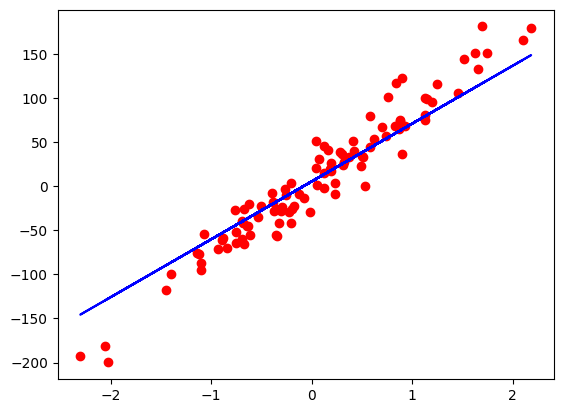

In [40]:
# 3 training loop

num_epochs=100

for epoch in range(num_epochs):
    #forward pass and calc loss (calc loss is part of forward pass)
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    
    #backward pass (calc gradients)
    loss.backward()
    
    #update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1)%10==0:
        print(f"epoch {epoch+1}, loss {loss:.4f}")
        
# plot
predicted = model(X).detach().numpy() #generate new tensor that detach from grad computation
plt.plot(X_numpy,y_numpy,"ro")
plt.plot(X_numpy,predicted,"b")
plt.show()

# logistic regression

pytorch training pipeline

0. prepare data
1. design model (input,output size,forward pass)
2. construct loss and optimizer
3. training loop
- forward pass
- backward pass
- update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

In [25]:
# 0 data
bc = datasets.load_breast_cancer()
X,y = bc.data,bc.target

# num_samples,n_features
n_samples,n_features=X.shape
print(n_samples,n_features)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

#scale
sc = StandardScaler() #scale features to standard scale, 0 mean 1 std - gaussian distribution

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#change y from row vector to col vector

569 30
torch.Size([455, 30]) torch.Size([114, 30]) torch.Size([455]) torch.Size([114])
torch.Size([455, 30]) torch.Size([114, 30]) torch.Size([455, 1]) torch.Size([114, 1])


In [26]:
# 1 model - f=w*x+b,sigmoid at the end

class CustomLogisticRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(CustomLogisticRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    def forward(self,x):
#         x1=self.linear(x)
#         return nn.Sigmoid(x1)
        x1=self.linear(x)
        y_predicted=torch.sigmoid(x1)
        return y_predicted

num_samples,num_features=X.shape
print(num_samples,num_features)
input_dim=num_features
output_dim=1 #we want only want output value for predictions
model=CustomLogisticRegression(input_dim,output_dim)

569 30


In [27]:
# 2 loss and optimizer
learning_rate=0.01
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [28]:
# 3 training loop

num_epochs=200
for epoch in range(num_epochs):
    # forward pass - prediction and calc loss 
    y_predicted=model(X_train)
    loss=criterion(y_predicted,y_train)
    
    # backward pass - calc gradients of LOSS FUNCTION
    loss.backward()
    
    # update weights
    optimizer.step() #update weights
    optimizer.zero_grad() #empty the weights at the end of the epoch
    
    if (epoch+1)%10==0:
        print(f"epoch {epoch+1} loss: {loss.item():.4f}")

epoch 10 loss: 0.5369
epoch 20 loss: 0.4518
epoch 30 loss: 0.3956
epoch 40 loss: 0.3555
epoch 50 loss: 0.3251
epoch 60 loss: 0.3012
epoch 70 loss: 0.2818
epoch 80 loss: 0.2656
epoch 90 loss: 0.2519
epoch 100 loss: 0.2401
epoch 110 loss: 0.2299
epoch 120 loss: 0.2208
epoch 130 loss: 0.2127
epoch 140 loss: 0.2055
epoch 150 loss: 0.1990
epoch 160 loss: 0.1930
epoch 170 loss: 0.1876
epoch 180 loss: 0.1827
epoch 190 loss: 0.1781
epoch 200 loss: 0.1739


In [29]:
with torch.no_grad():
    y_predicted=model(X_test) #since this is binary classifcation
    #above 0.5 threshold -> class 1, below 0.5 -> class 0
    y_predicted_classes=y_predicted.round()
    acc=y_predicted_classes.eq(y_test).sum()/float(y_test.shape[0])
    print(f"accuracy {acc:.4f}")

accuracy 0.9211


in this example, you are doing gradient calc on the entire dataset, so next part is splitting the dataset into batches, to save compute time and resources etc.

# dataset and dataloaders

epoch = 1 forward and backward pass of all training samples in the dataset
batch_size = number of training samples in 1 forward and backward pass
num_iterations = number of passes, where each pass uses batch_size num of samples

e.g. 100 samples, batch_size=20
1 epoch = 100 samples, num_iterations=100/batch_size=num_iterations for 1 epoch

In [11]:
import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.functional as F
import numpy as np
import math

In [30]:
file_name="wine.csv"
class WineDataset(Dataset):
    def __init__(self):
        xy=np.loadtxt(file_name,delimiter=",",dtype=np.float32,skiprows=1)
        self.x=torch.from_numpy(xy[:,1:])
        self.y=torch.from_numpy(xy[:,[0]]) #[0] skips y=y.view(num_features,1) step
        self.n_samples=xy.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_samples
    
    def dummy(self):
        return xy
    
dataset=WineDataset()
first=dataset[0]
features,labels=first
print(features,labels)
print("\n")

batch_size=4
dataloader=DataLoader(dataset=dataset,batch_size=batch_size,shuffle=True)

#check the dataset
dataiter=iter(dataloader)
data=next(dataiter)
features,labels=data
print(features,labels) #number of vectors printed follows the batch_size specified

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


tensor([[1.2600e+01, 2.4600e+00, 2.2000e+00, 1.8500e+01, 9.4000e+01, 1.6200e+00,
         6.6000e-01, 6.3000e-01, 9.4000e-01, 7.1000e+00, 7.3000e-01, 1.5800e+00,
         6.9500e+02],
        [1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02],
        [1.3710e+01, 1.8600e+00, 2.3600e+00, 1.6600e+01, 1.0100e+02, 2.6100e+00,
         2.8800e+00, 2.7000e-01, 1.6900e+00, 3.8000e+00, 1.1100e+00, 4.0000e+00,
         1.0350e+03],
        [1.3880e+01, 1.8900e+00, 2.5900e+00, 1.5000e+01, 1.0100e+02, 3.2500e+00,
         3.5600e+00, 1.7000e-01, 1.7000e+00, 5.4300e+00, 8.8000e-01, 3.5600e+00,
         1.0950e+03]]) tensor([[3.],
        [3.],
        [1.],
        [1.]])


In [3]:
# training loop
num_epochs=2
total_samples=len(dataset)
n_iterations=math.ceil(total_samples/batch_size)
#The math.ceil() method rounds a number UP to the nearest integer, if necessary, and returns the result. 

for epoch in range(num_epochs):
    for i,(inputs,labels) in enumerate(dataloader):
        if (i+1)%5==0:
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}")
        #forward
        
        #calc loss function
        
        #calc gradient of loss function
         
        #update weights
        
        #zero the gradients

epoch 1/2, step 5/45
epoch 1/2, step 10/45
epoch 1/2, step 15/45
epoch 1/2, step 20/45
epoch 1/2, step 25/45
epoch 1/2, step 30/45
epoch 1/2, step 35/45
epoch 1/2, step 40/45
epoch 1/2, step 45/45
epoch 2/2, step 5/45
epoch 2/2, step 10/45
epoch 2/2, step 15/45
epoch 2/2, step 20/45
epoch 2/2, step 25/45
epoch 2/2, step 30/45
epoch 2/2, step 35/45
epoch 2/2, step 40/45
epoch 2/2, step 45/45


In [7]:
dataset.dummy().unique()

tensor([1., 2., 3.])

In [9]:
dataset.__len__()

178

# dataset transforms

Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms: 
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda 

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

In [32]:
import torch 
import torchvision
from torch.utils.data import Dataset
import numpy as np

class WineDataset(Dataset):
    def __init__(self,transform=None):
        xy=np.loadtxt("wine.csv",delimiter=",",dtype=np.float32,skiprows=1)
        self.n_samples=xy.shape[0]
        self.n_features=xy.shape[1]
        
        #not converting to tensor here
        self.x=xy[:,1:]
        self.y=xy[:,[0]]
        
        self.transform=transform
        
    def __getitem__(self,index):
        sample = self.x[index],self.y[index]
        if self.transform:
            sample=self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_samples
    
class ToTensor:
    def __call__(self,sample):
        inputs,targets=sample
        return torch.from_numpy(inputs),torch.from_numpy(targets)
    
class MulTransform:
    def __init__(self,factor):
        self.factor=factor
    
    def __call__(self,sample):
        inputs,targets=sample
        inputs*=self.factor
        return inputs,targets
    
    

In [36]:
dataset=WineDataset(transform=None)
print(dataset.n_samples)
print(dataset.n_features)

first_data=dataset[0]
features,labels=first_data
print(features,len(features),type(features))
print(labels,len(labels),type(labels))

178
14
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] 13 <class 'numpy.ndarray'>
[1.] 1 <class 'numpy.ndarray'>


In [12]:
model(X_test)

tensor([9.2394], grad_fn=<AddBackward0>)

In [38]:
composed=torchvision.transforms.Compose([
    ToTensor(),
    MulTransform(2)
])

dataset=WineDataset(transform=composed)
first_data=dataset[0]
features,labels=first_data
print(features,len(features),type(features))
print(labels,len(labels),type(labels))

#the numbers have been multiplied by 2 from previous and the types have changed

tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]) 13 <class 'torch.Tensor'>
tensor([1.]) 1 <class 'torch.Tensor'>


# softmax and cross entropy

sigmoid and binary cross entorpy loss always used tgt = binary classication
softmax and cross entropy loss always used tgt - multi-class classification 

In [41]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)

X=np.array([1,2,0.1],dtype=np.float32)
outputs=softmax(X)
print("softmax numpy: ",outputs) #this represents the probabilities of those input raw values

softmax numpy:  [0.24243298 0.6590011  0.09856589]


In [45]:
X=torch.tensor([1,2,0.1])
# X=np.array([1,2,0.1],dtype=np.float32)
# X=torch.from_numpy(X)
outputs=torch.softmax(X,dim=0) #compute along the first axis
print("torch softmax: ",outputs)

torch softmax:  tensor([0.2424, 0.6590, 0.0986])


In [48]:
#example of cross entropy loss
def cross_entropy(actual,predicted):
    return -np.sum(actual*np.log(predicted))

y=np.array([1,0,0]) #one hot encoder of classes

y_good_pred=np.array([0.7,0.2,0.1])
y_bad_pred=np.array([0.1,0.7,0.2])
l1=cross_entropy(y,y_good_pred)
l2=cross_entropy(y,y_bad_pred)
l1,l2 #good pred has low loss, bad pred has high loss

(0.35667494393873245, 2.3025850929940455)

In [54]:
#in pytorch 
loss=nn.CrossEntropyLoss()
Y=torch.tensor([0])
#eg nsamples x nclasses=1x3
Y_pred_good=torch.tensor([[2.0,1.0,0.1]]) #raw values
Y_pred_bad=torch.tensor([[0.5,2.0,0.2]]) #raw values
Y_pred_bad2=torch.tensor([[0.5,2.0,2.5]]) #raw values

l1=loss(Y_pred_good,Y)
l2=loss(Y_pred_bad,Y)
l1,l2  #l1 has lower loss than l2 since its good prediction

(tensor(0.4170), tensor(1.8282))

In [55]:
_,prediction1=torch.max(Y_pred_good,1)
_,prediction2=torch.max(Y_pred_bad,1)
_,prediction3=torch.max(Y_pred_bad2,1)
prediction1,prediction2,prediction3 #find the max value in the prediction and takes that as the class predicted

(tensor([0]), tensor([1]), tensor([2]))

In [62]:
#in pytorch - multiple samples
loss=nn.CrossEntropyLoss()
Y=torch.tensor([2,0,1])
#eg nsamples x nclasses=1x3
Y_pred_good=torch.tensor([
    [1.0,2.0,3.2],
    [7.0,1.0,0.2],
    [0.5,2.3,1.7]
]) #raw values

Y_pred_bad=torch.tensor([
    [0.1,2.0,0.1],
    [0.5,1.0,0.2],
    [0.5,2.3,1.7]
]) #raw values

l1=loss(Y_pred_good,Y)
l2=loss(Y_pred_bad,Y)
l1,l2  #l1 has lower loss than l2 since its good prediction

(tensor(0.2958), tensor(1.3071))

In [65]:
_,prediction1=torch.max(Y_pred_good,1)
_,prediction2=torch.max(Y_pred_bad,1)
print("Y actual: ",Y)
prediction1,prediction2, #find the max value in the prediction and takes that as the class predicted

Y actual:  tensor([2, 0, 1])


(tensor([2, 0, 1]), tensor([1, 1, 1]))

nn.CrossEntropyLoss() applies
nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
- so you dont add a softmax layer again at the end

Y should be class labels and not OneHot
example 
Y_classes=np.array([1,3,2,1,4])
not Y_classes_onehot = np.array([
    [1,0,0,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,0,0,1]
])

Y_pred should be raw scores not the values after softmax layer

In [54]:
#in pytorch
loss=nn.CrossEntropyLoss()
Y=torch.tensor([0])
#eg nsamples x nclasses=1x3
Y_pred_good=torch.tensor([[2.0,1.0,0.1]]) #raw values
Y_pred_bad=torch.tensor([[0.5,2.0,0.2]]) #raw values
Y_pred_bad2=torch.tensor([[0.5,2.0,2.5]]) #raw values

l1=loss(Y_pred_good,Y)
l2=loss(Y_pred_bad,Y)
l1,l2  #l1 has lower loss than l2 since its good prediction

(tensor(0.4170), tensor(1.8282))

In [55]:
_,prediction1=torch.max(Y_pred_good,1)
_,prediction2=torch.max(Y_pred_bad,1)
_,prediction3=torch.max(Y_pred_bad2,1)
prediction1,prediction2,prediction3 #find the max value in the prediction and takes that as the class predicted

(tensor([0]), tensor([1]), tensor([2]))

In [67]:
# example multiclass problem

class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size) #linear layer 1
        self.relu1=nn.ReLU() #activation function 1
        self.linear2=nn.Linear(hidden_size,num_classes) #linear layer 1
    
    def forward(self,x):
        out=self.linear1(x)
        out=self.relu1(out)
        out=self.linear2(out)
        #no softmax at the end
        return out
    
model=NeuralNet(input_size=28*28,hidden_size=5,num_classes=3)
criterion=nn.CrossEntropyLoss() # applies softmax

In [68]:
# example binary class problem

class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size):
        super(NeuralNet,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size) #linear layer 1
        self.relu1=nn.ReLU() #activation function 1
        self.linear2=nn.Linear(hidden_size,1) #linear layer 1, binary class problem, only 1 output value, >0.5 class 2, below class 1
    
    def forward(self,x):
        out=self.linear1(x)
        out=self.relu1(out)
        out=self.linear2(out)
        y_pred=torch.sigmoid(out)
        return y_pred
    
model=NeuralNet(input_size=28*28,hidden_size=5)
criterion=nn.BCELoss() # applies softmax

# activation function

they apply a non linear transformation to the model
-else its just a complicated linear regression model, cant learn more complicated relationships 
determine whther an incoming neuron should be activated or not

In [ ]:
# sigmoid function - used in last layer of binary class problem
f(x) = 1/(1+exp(1)**(-x))

In [ ]:
# tanh function -used for hidden layers

In [ ]:
# relu function - if udk which function to use, just use ReLU
f(x) = max(0,x)

In [ ]:
# leaky relu - improved version of ReLU - tries to solve vanishing gradient problem

In [ ]:
# softmax function - last layer in multi class problem
# - squash values into different proababilites

In [95]:
# multi class problem

class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size)
        self.relu1=nn.ReLU()
        self.linear2=n.Linear(hidden_size,num_classes)
        self.softmax1=nn.Softmax()
#         nn.Sigmoid()
#         nn.Tanh()
#         nn.LeakyReLU()
        
    def forward(self,x):
        out=self.linear1(x)
        out=self.relu1(out)
        out=self.linear2(out)
        predicted_class=self.softmax1(out)
        return predicted_class
    
    # or 
    
    def forward(self,x):
        out=self.linear1(x)
        out=torch.relu(out)
        out=self.linear(out)
        predicted_class=torch.softmax(out)
#         torch.sigmoid
#         torch.tanh
#         # or can 
#         import torch.nn.functional as F
#         F.relu
#         F.leaky_relu
        return predicted_class


# MNIST feed forward neural network 

In [19]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device=torch.device("cuda" if torch.cuda.is_available else "cpu")
print(device)

input_size=28*28
hidden_size=100 # can expt with this
num_classes=10 #0-9
num_epochs=5
batch_size=100
lr=1e-3

train_dataset=torchvision.datasets.MNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset=torchvision.datasets.MNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor(),
    download=False
)

cuda


In [20]:
train_loader=torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader=torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

train_iter = iter(train_loader)
examples,labels=next(train_iter)
examples.shape,labels.shape
#100 examples which follows batch size
# 1 channel
#images of size 28x28

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

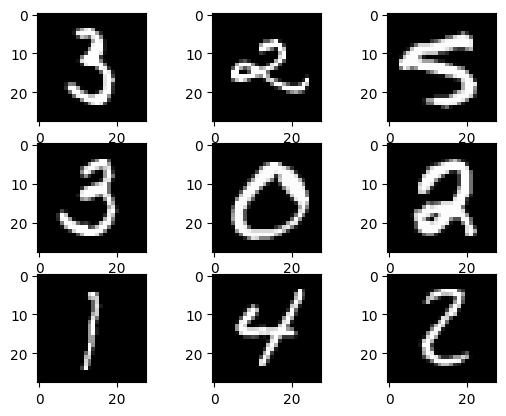

In [21]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(examples[i][0],cmap="gray")
    
plt.show()

In [11]:
#multi class problem

class MNISTNeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(MNISTNeuralNetwork,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(hidden_size,num_classes)
#         self.softmax1=nn.Softmax()
        #dont use softmax, softmax is an activation function and the loss function at the end CrossEntropyLoss already implements softmax
        
    def forward(self,x):
        output=self.linear1(x)
        output=self.relu1(output)
        output=self.linear2(output)
#         predicted_probabilites=self.softmax1(output)
        return output

#define model
model=MNISTNeuralNetwork(input_size=input_size,hidden_size=hidden_size,num_classes=num_classes)

#loss
criterion=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(
    model.parameters(),
    lr=lr
)

print(f"num training steps: {len(train_loader)}")
#training loop
for epoch in range(num_epochs): #iterate per epoch
    for i,(images,labels) in enumerate(train_loader): #iterate per batch
        #reshape - flatten
        images=images.reshape(-1,28*28)
        #to device
        images.to(device)
        labels.to(device)
        #forward
        outputs=model.forward(images)
        #loss
        loss=criterion(outputs,labels)
        #backward pass - calc gradients and upadte weights
        optimizer.zero_grad() #zero gradients of optimizer before next loop
        loss.backward() #calc gradients of loss function
        optimizer.step() #update weights
        
        if (i+1)%100==0:
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{len(train_loader)}, loss={loss.item():.4f}")
                  
        

num training steps: 600
epoch 1/5, step 100/600, loss=0.4993
epoch 1/5, step 200/600, loss=0.4844
epoch 1/5, step 300/600, loss=0.2732
epoch 1/5, step 400/600, loss=0.2795
epoch 1/5, step 500/600, loss=0.3295
epoch 1/5, step 600/600, loss=0.2853
epoch 2/5, step 100/600, loss=0.1891
epoch 2/5, step 200/600, loss=0.2750
epoch 2/5, step 300/600, loss=0.2172
epoch 2/5, step 400/600, loss=0.1763
epoch 2/5, step 500/600, loss=0.2452
epoch 2/5, step 600/600, loss=0.2008
epoch 3/5, step 100/600, loss=0.0919
epoch 3/5, step 200/600, loss=0.0978
epoch 3/5, step 300/600, loss=0.0816
epoch 3/5, step 400/600, loss=0.1230
epoch 3/5, step 500/600, loss=0.1820
epoch 3/5, step 600/600, loss=0.0993
epoch 4/5, step 100/600, loss=0.1426
epoch 4/5, step 200/600, loss=0.1032
epoch 4/5, step 300/600, loss=0.1260
epoch 4/5, step 400/600, loss=0.1367
epoch 4/5, step 500/600, loss=0.2124
epoch 4/5, step 600/600, loss=0.0538
epoch 5/5, step 100/600, loss=0.1091
epoch 5/5, step 200/600, loss=0.0958
epoch 5/5, ste

In [22]:
#multi class problem

class MNISTNeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(MNISTNeuralNetwork,self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(hidden_size,num_classes)
#         self.softmax1=nn.Softmax()
        #dont use softmax, softmax is an activation function and the loss function at the end CrossEntropyLoss already implements softmax
        
    def forward(self,x):
        output=self.linear1(x)
        output=self.relu1(output)
        output=self.linear2(output)
#         predicted_probabilites=self.softmax1(output)
        return output

#define model
model=MNISTNeuralNetwork(input_size=input_size,hidden_size=hidden_size,num_classes=num_classes)

#loss
criterion=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(
    model.parameters(),
    lr=lr
)

print(f"num training steps: {len(train_loader)}")
#training loop
for epoch in range(num_epochs): #iterate per epoch
    for i,(images,labels) in enumerate(train_loader): #iterate per batch
        #reshape - flatten
        print(images.shape,labels.shape)
        images=images.reshape(-1,28*28)
        #to device
        images.to(device)
        labels.to(device)
        print(images.shape,labels.shape)
        #forward
        outputs=model.forward(images)
        print(outputs.shape,labels.shape)
        #loss
        loss=criterion(outputs,labels)
        #backward pass - calc gradients and upadte weights
        optimizer.zero_grad() #zero gradients of optimizer before next loop
        loss.backward() #calc gradients of loss function
        optimizer.step() #update weights
        
        if (i+1)%100==0:
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{len(train_loader)}, loss={loss.item():.4f}")
        break
    break
        

num training steps: 600
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 784]) torch.Size([100])
torch.Size([100, 10]) torch.Size([100])


In [13]:
# find accucary on current model using test set

with torch.no_grad(): #ensre weights not adjusted here
    n_correct,n_samples=0,0
    for images,labels in test_loader:
        #reshape
        images=images.reshape(-1,28*28)
        #to device
        images.to(device)
        labels.to(device)
        #make predictions
        output_values=model(images)
        
        _,predictions=torch.max(output_values,1) #value,index
        n_samples=len(labels)
        n_correct=(predictions==labels).sum().item()
        
acc=100*n_correct/n_samples
print(f"accuracy of current model: {acc}")

accuracy of current model: 97.0


# CIFAR10 CNN implementation

conv>activation function>pooling>FCN
-conv: applying a filter to images to produce another conv image
-pooling (eg max pooling): downsample an image
-padding: To maintain the dimension of output as in input , we use padding. Padding is a process of adding zeros to the input matrix symmetrically

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

#device configuration
device=torch.device("cuda" if torch.cuda.is_available else "cpu")

#hyperparameters
num_epochs=5
num_classes=10
batch_size=4
lr=1e-3

#dataset has PIL image of range [0,1]
#then transform to Tensors or normalized range [-1,1]

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset=torchvision.datasets.CIFAR10(
    root="./data",
    download=True,
    train=True,
    transform=transform
)

test_dataset=torchvision.datasets.CIFAR10(
    root="./data",
    download=True,
    train=False,
    transform=transform
)

train_loader=torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader=torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

train_iter=iter(train_loader)
images,labels=next(train_iter)
images.shape,labels.shape
# batch size of 4 of 3 rgb channels, each image 32x32

Files already downloaded and verified
Files already downloaded and verified


(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [67]:
images.shape

torch.Size([4, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


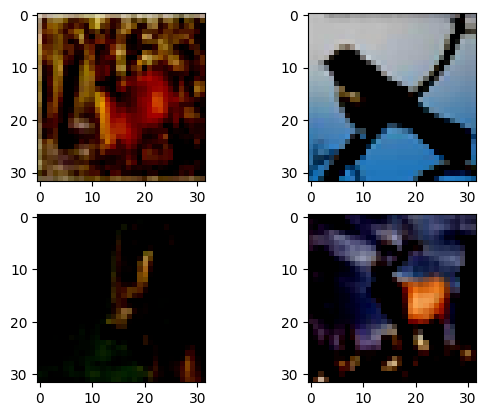

In [68]:
#plot tensor images using matplotlib
plot_images=images.numpy()
# Transpose the dimensions of the images array to match the expected format (batch_size, height, width, channels)
plot_images=images.numpy()

for i in range(4):
    plt.subplot(2,2,i+1)
    image=plot_images[i]
    image=image.transpose(1,2,0)
    plt.imshow(image)
    
plt.show()

In [69]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(3,6,5) #3 rgb input channels, set 6 output channels, kernel size 5x5
#        torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.pool1=nn.MaxPool2d(2,2) #kernel size 2, stride 2
        self.conv2=nn.Conv2d(6,16,5) #input size must be same as previous conv output size
        self.pool2=nn.MaxPool2d(2,2) #kernel size 2, stride 2
        #to get 16*5*5 can print out the diff layers output manualy first
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,num_classes)
    
    def forward(self,x):
        out=self.pool1(F.relu(self.conv1(x)))
        out=self.pool2(F.relu(self.conv2(out)))
        #flatten
        out=out.view(-1,16*5*5)
        out=F.relu(self.fc1(out))
        out=F.relu(self.fc2(out))
        out=self.fc3(out)
        #softmax already included in the loss function so dont need here
        return out
    


In [79]:
#define model
model=ConvNet()
#loss
criterion=nn.CrossEntropyLoss() #alr includes softmax
optimizer=torch.optim.SGD(
    model.parameters(),
    lr=lr
)

print(f"num training steps per batch: {len(train_loader)}")
print("\n")

overall_start_time=time.time()
#training loop
for epoch in range(num_epochs):
    epoch_start_time=time.time()
    for i,(images,labels) in enumerate(train_loader):
#         #reshape flatten
#         images=images.reshape(-1,32*32) # cannot flatten now because need to apply conv first
        #to device
        images.to(device)
        labels.to(device)
        
        #forward pass
#         outputs=model.forward(images) #not model.forward but just model()
        outputs=model.forward(images)
        #calc loss
        loss=criterion(outputs,labels)
        #zero grad
        optimizer.zero_grad()
        #calc gradients of loss fn
        loss.backward()
        #update weights
        optimizer.step()
        
        if (i+1)%1250==0:
            print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{len(train_loader)},loss: {loss.item():.4f}, time elapsed: {time.time()-epoch_start_time}")    

    epoch_end_time=time.time()
    epoch_duration=epoch_end_time-epoch_start_time
    print(f"epoch {epoch+1} took {epoch_duration}s")
    print("\n")
    
overall_end_time=time.time()
print(f"total time taken: {overall_end_time-overall_start_time}s")

num training steps per batch: 12500


epoch 1/5, step 1250/12500,loss: 2.3077, time elapsed: 11.256197929382324
epoch 1/5, step 2500/12500,loss: 2.2965, time elapsed: 22.40045428276062
epoch 1/5, step 3750/12500,loss: 2.2885, time elapsed: 33.44072222709656
epoch 1/5, step 5000/12500,loss: 2.3137, time elapsed: 44.38977026939392
epoch 1/5, step 6250/12500,loss: 2.3403, time elapsed: 55.676469564437866
epoch 1/5, step 7500/12500,loss: 2.2546, time elapsed: 67.09809184074402
epoch 1/5, step 8750/12500,loss: 2.2626, time elapsed: 77.55254483222961
epoch 1/5, step 10000/12500,loss: 2.2709, time elapsed: 88.57306265830994
epoch 1/5, step 11250/12500,loss: 2.1843, time elapsed: 99.02964329719543
epoch 1/5, step 12500/12500,loss: 1.6405, time elapsed: 109.72224473953247
epoch 1 took 109.7252242565155s


epoch 2/5, step 1250/12500,loss: 2.0570, time elapsed: 10.951547861099243
epoch 2/5, step 2500/12500,loss: 1.9079, time elapsed: 21.41889452934265
epoch 2/5, step 3750/12500,loss: 1.9290, time

In [93]:
#find accuracy on test set

with torch.no_grad():
    n_samples,n_correct=0,0
    n_class_correct=[0 for i in range(num_classes)]
    n_class_samples=[0 for i in range(num_classes)]
    for images,labels in test_loader:
        #reshape
#         images=images.reshape(-1,32*32)
        #to device
        images.to(device)
        labels.to(device)        
        
        outputs=model.forward(images)
        #value,index
        _,predictions=torch.max(outputs,1)
        n_samples=len(labels)
        n_correct=(predictions==labels).sum().item()
        
        for i in range(batch_size):
            label=labels[i]
            pred=predictions[i]
            if label==pred:
                n_class_correct[i]+=1
                n_class_samples[i]+=1
                
#overall accuracy                
acc=100*n_correct/n_samples
print(f"accuracy on current model is {acc}")

#individual classes accuracy
for i in range(10):
    try:
        class_acc=100*n_class_correct[i]/n_class_samples[i]
        print(f"accuracy of class {i} is {class_acc}")
    except ZeroDivisionError:
        print(f"for class {i}, there were no samples in test set")

accuracy on current model is 50.0
accuracy of class 0 is 100.0
accuracy of class 1 is 100.0
accuracy of class 2 is 100.0
accuracy of class 3 is 100.0
for class 4, there were no samples in test set
for class 5, there were no samples in test set
for class 6, there were no samples in test set
for class 7, there were no samples in test set
for class 8, there were no samples in test set
for class 9, there were no samples in test set


# transfer learning

For those new to transfer learning: ideally we would like to freeze all of the layers other than the newly added head layer, and train for n epochs, then unfreeze the preceding layers, and train the entire network using a sliced learning rate, where the parameters of the later layers are updated faster than the parameters of the earlier layers. This is how libraries like fastai handle transfer learning out of the box.

## self attempt

In [23]:
#import libraries
import torch
import torch.nn as nn
import torchvision 
import os
from PIL import Image
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time 
import copy

#create custom dataset classes, may need to do train test split
class Hymenoptera_Dataset(Dataset):
    def __init__(self,root_path,mode=None,train_transforms=None,val_transforms=None):
        #read root_path and find the paths of the train and val folder
        self.train_path=sorted(os.listdir(root_path))[0]
        self.val_path=sorted(os.listdir(root_path))[1]
        self.train_path=os.path.join(root_path,self.train_path)
        self.val_path=os.path.join(root_path,self.val_path)
        #get class names
        self.class_names=os.listdir(self.train_path)
        #create full paths of train_folder_path + respective classes, repeat for val
        self.train_class_paths=[]
        self.val_class_paths=[]
        for class_name in self.class_names:
            train_class_path=os.path.join(self.train_path,class_name)
            val_class_path=os.path.join(self.val_path,class_name)
            self.train_class_paths.append(train_class_path)
            self.val_class_paths.append(val_class_path)
        #get the full paths for all the train images for all classes and store in a list
        self.train_image_paths=[]
        for class_path in self.train_class_paths:
            train_paths=os.listdir(class_path)
            for train_path in train_paths:
                self.train_image_paths.append(os.path.join(class_path,train_path))
        #get the full paths for all the val images for all classes and store in a list
        self.val_image_paths=[]
        for class_path in self.val_class_paths:
            val_paths=os.listdir(class_path)
            for val_path in val_paths:
                self.val_image_paths.append(os.path.join(class_path,val_path))
        #class encoder - use a dictionary to create a mapping of a given class to an assigned int
        self.class_encoder={}
        for i,class_name in enumerate(self.class_names):
            self.class_encoder[class_name]=i
        
        self.mode=mode
        self.train_transforms=train_transforms
        self.val_transforms=val_transforms
        
    def __getitem__(self,index):
        if self.mode=="train":
            image_path=self.train_image_paths[index]
            # Open the image using PIL and convert it to a PyTorch tensor later in the transforms.ToTensor()
            image=Image.open(image_path)
            if image.mode != "RGB":
                image = image.convert("RGB")
            image=self.train_transforms(image)
            class_label=image_path.split("\\")[-2]
            label=label=self.class_encoder[class_label]
            return image,label,class_label
        else:
            image_path=self.val_image_paths[index]
            # Open the image using PIL and convert it to a PyTorch tensor later in the transforms.ToTensor()
            image=Image.open(image_path)
            image=self.val_transforms(image)
            class_label=image_path.split("\\")[-2]
            label=self.class_encoder[class_label]
            return image,label,class_label 
        
    def __len__(self):
        if self.mode=="train":
            return len(self.train_image_paths)
        else:
            return len(self.val_image_paths)
        
# set train and val transforms
img_dim=224
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])
def train_transforms():
    t=transforms.Compose([
        transforms.Resize((img_dim,img_dim)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(90),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,std=std) 
    ])
    return t

def val_transforms():
    t=transforms.Compose([
        transforms.Resize((img_dim,img_dim)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,std=std) 
    ])
    return t

In [24]:
#initialise train data and val data from the custom dataset classroot_path="C:/Users/Palaash.HPZ/Downloads/hymenoptera_data"
root_path="C:/Users/Palaash.HPZ/Downloads/hymenoptera_data"

train_data=Hymenoptera_Dataset(
    root_path=root_path,
    mode="train",
    train_transforms=train_transforms(),
)

val_data=Hymenoptera_Dataset(
    root_path=root_path,
    mode="val",
    val_transforms=val_transforms()
)

print(train_data.__len__(),val_data.__len__())

245 153


In [25]:
batch_size=4
#create train and val dataloader
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

val_dataloader=DataLoader(
    dataset=val_data,
    batch_size=batch_size,
    shuffle=False,
    drop_last=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 224, 224]) torch.Size([4])


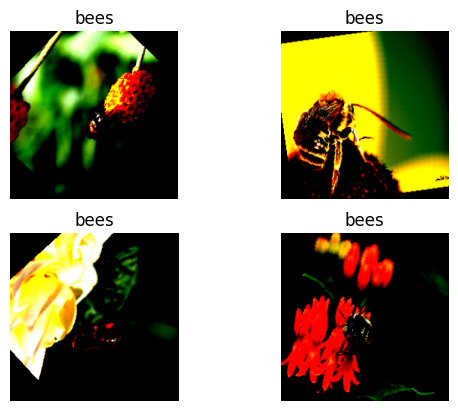

In [26]:
#plot some images with labels
train_iter=iter(train_dataloader)
images,labels,class_labels=next(train_iter)
print(images.shape,labels.shape) #batch_size=4 images of 3 RGB channels, img_dim=224, corresponding labels
for i in range(batch_size):
    plt.subplot(int(batch_size/2),int(batch_size/2),i+1)
    img=images[i]
    img=img.numpy()
    img=img.transpose(1,2,0)
    plt.imshow(img)
    plt.title(class_labels[i])
    plt.axis("off")

In [30]:
# this function is currently for binary classification task
def get_accuracy(outputs,labels): #need to change according to task, binary, multi class etc
    threshold=0.5
    predicted_class=[1 if outputs[i]>=threshold else 0 for i in range(len(outputs))]
    acc=[1 if predicted_class[i]==labels[i] else 0 for i in range(len(outputs))]
    total_acc=np.sum(acc)/len(outputs)
    return total_acc
 
    


def train_one_epoch(model,criterion,optimizer):
    running_loss=[] #add values of each batch
    running_acc=[] #add values of each batch
    epoch_start_time=time.time()
    print("-"*10)
    print(f"Start of Training Epoch {epoch+1}/{num_epochs}")
    for i,(images,labels,class_labels) in enumerate(train_dataloader): #per batch
        #to(device)
        # need to reshape labels to [N,1] shape
        print(images.shape,labels.shape)
        labels=labels.reshape(len(labels),1).float()
        images=images.to(device)
        labels=labels.to(device)
        print(images.shape,labels.shape)
        #forward pass 
        outputs=model(images)
        print(outputs.shape,labels.shape)
        #calc loss function
#         print("outputs",outputs.shape,type(outputs),outputs)
#         print("labels",labels.shape,type(labels),labels)
        loss=criterion(outputs,labels)
        #zero optimizer grad
        optimizer.zero_grad()
        #calc gradients of loss function and add to running_loss list
        loss.backward()
        running_loss.append(loss.item())
        #update weights of grad
        optimizer.step()
        #calc accuracy and add to running_acc list
        acc=get_accuracy(outputs,labels)
        running_acc.append(acc)
        #calc current time
        step_time_elapsed=time.time()-epoch_start_time
        #print relevant values - step num, running loss, running acc, running time (running means so far)
        if (i+1)%10==0: #ensures theres always 10 lines of batch results regardless len(train_dataloader)
            print(f"Step {i+1}/{len(train_dataloader)}), mean running loss:{np.mean(running_loss):.4f}, mean running accuracy:{np.mean(running_acc):.4f}, time elapsed:{step_time_elapsed:.4f}")
        break
    #calc epoch mean loss and acc
    trg_epoch_mean_loss=np.mean(running_loss)
    trg_epoch_mean_acc=np.mean(running_acc)
    trg_epoch_time_elapsed=time.time()-epoch_start_time
    print(f"End of Training Epoch {epoch+1}/{num_epochs}, mean training loss:{trg_epoch_mean_loss:.4f}, mean training accuracy:{trg_epoch_mean_acc:.4f}, training time elapsed:{trg_epoch_time_elapsed:.4f}")
    
    return model,trg_epoch_mean_loss,trg_epoch_mean_acc,trg_epoch_time_elapsed 

def val_one_epoch(model,criterion,optimizer,best_val_acc):
    running_loss=[]
    running_acc=[]
    epoch_start_time=time.time()
    for i,(images,labels,class_labels) in enumerate(train_dataloader):
        #to(device)
        #reshape labels
        labels=labels.reshape(len(labels),1).float()
        images=images.to(device)
        labels=labels.to(device)
        #forward pass
        outputs=model(images)
        #backward pass - calc loss, zero grad of optimizer, calc gradients of loss fn, update weights of optimizer
        loss=criterion(outputs,labels)
        running_loss.append(loss.item())
        #calc acc
        acc=get_accuracy(outputs,labels)
        running_acc.append(acc)
    
    val_epoch_mean_loss=np.mean(running_loss)
    val_epoch_mean_acc=np.mean(running_acc)
    val_epoch_time_elapsed=time.time()-epoch_start_time
    print(f"Validation for Epoch {epoch+1}/{num_epochs}, mean validation loss:{val_epoch_mean_loss:.4f}, mean validation acc:{val_epoch_mean_acc:.4f}, mean validation time elapsed:{val_epoch_time_elapsed:.4f}")
    
    if val_epoch_mean_acc>best_val_acc:
        #update new best_val_acc
        best_val_acc=val_epoch_mean_loss
        #set new best weights to current epoch model weights
        best_model_weights=copy.deepcopy(model.state_dict())
        
    #load the best model weights - this is helpful at the last epoch since the model is update with best weights at the end of entire trainig process
    model.load_state_dict(best_model_weights)
    
    return model,val_epoch_mean_loss,val_epoch_mean_acc,val_epoch_time_elapsed,best_val_acc

In [28]:
#set device
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")

#define model, model to device
#load pretrained model and change the final layer only
model=torchvision.models.resnet18(pretrained=True)
num_ftrs=model.fc.in_features
# model.fc=nn.Linear(num_ftrs,len(train_data.class_names))
model.fc=nn.Linear(num_ftrs,1)
model=model.to(device)

#initialise loss
criterion=nn.BCELoss()

lr=1e-3
#initialise optimizer
batch_size
optimizer=torch.optim.SGD(
    model.parameters(),
    lr=lr    
)

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [31]:
# implement training loop:

#initialise train logs to track progress
train_logs={"loss":[],"accuracy":[],"time":[]} #add values after 1 epoch only
val_logs={"loss":[],"accuracy":[],"time":[]} #add values after 1 epoch only

overall_start_time=time.time()
best_model_weights=copy.deepcopy(model.state_dict()) #need to compare at the end of the epoch and see if need update
best_val_acc=0.0

num_epochs=5
print("Start Training Loop")
for epoch in range(num_epochs):
    #train one epoch
    model,trg_epoch_mean_loss,trg_epoch_mean_acc,trg_epoch_time_elapsed=train_one_epoch(model,criterion,optimizer)
    #update train logs to plot later
    train_logs["loss"].append(trg_epoch_mean_loss)
    train_logs["accuracy"].append(trg_epoch_mean_acc)
    train_logs["time"].append(trg_epoch_time_elapsed)
    #validate current epoch
    model,val_epoch_mean_loss,val_epoch_mean_acc,val_epoch_time_elapsed,best_val_acc=val_one_epoch(model,criterion,optimizer,best_val_acc)
    val_logs["loss"].append(val_epoch_mean_loss)
    val_logs["accuracy"].append(val_epoch_mean_acc)
    val_logs["time"].append(val_epoch_time_elapsed)
    break
    
overall_end_time=time.time()
overall_time_elapsed=overall_end_time-overall_start_time
print(f"End of Training Loop, overall time elapsed:{overall_time_elapsed}")

Start Training Loop
----------
Start of Training Epoch 1/5
torch.Size([4, 3, 224, 224]) torch.Size([4])
torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
torch.Size([4, 1]) torch.Size([4, 1])


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [32]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## code from github

['ants', 'bees']


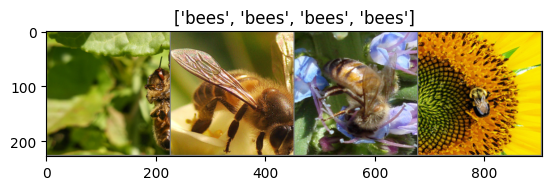

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

# data_dir = 'data/hymenoptera_data'
data_dir="C:/Users/Palaash.HPZ/Downloads/hymenoptera_data"

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1,num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

num_epochs=5
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=num_epochs)

## retry attempt - try implement without functions first, then abstract later
-when zai alr, then do using functions from scratch

In [1]:
#import libraries
import torch
import torch.nn as nn
import torchvision 
import os
from PIL import Image
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time 
import copy

#create custom dataset classes, may need to do train test split
class Hymenoptera_Dataset(Dataset):
    def __init__(self,root_path,mode=None,train_transforms=None,val_transforms=None):
        #read root_path and find the paths of the train and val folder
        self.train_path=sorted(os.listdir(root_path))[0]
        self.val_path=sorted(os.listdir(root_path))[1]
        self.train_path=os.path.join(root_path,self.train_path)
        self.val_path=os.path.join(root_path,self.val_path)
        #get class names
        self.class_names=os.listdir(self.train_path)
        #create full paths of train_folder_path + respective classes, repeat for val
        self.train_class_paths=[]
        self.val_class_paths=[]
        for class_name in self.class_names:
            train_class_path=os.path.join(self.train_path,class_name)
            val_class_path=os.path.join(self.val_path,class_name)
            self.train_class_paths.append(train_class_path)
            self.val_class_paths.append(val_class_path)
        #get the full paths for all the train images for all classes and store in a list
        self.train_image_paths=[]
        for class_path in self.train_class_paths:
            train_paths=os.listdir(class_path)
            for train_path in train_paths:
                self.train_image_paths.append(os.path.join(class_path,train_path))
        #get the full paths for all the val images for all classes and store in a list
        self.val_image_paths=[]
        for class_path in self.val_class_paths:
            val_paths=os.listdir(class_path)
            for val_path in val_paths:
                self.val_image_paths.append(os.path.join(class_path,val_path))
        #class encoder - use a dictionary to create a mapping of a given class to an assigned int
        self.class_encoder={}
        for i,class_name in enumerate(self.class_names):
            self.class_encoder[class_name]=i
        
        self.mode=mode
        self.train_transforms=train_transforms
        self.val_transforms=val_transforms
        
    def __getitem__(self,index):
        if self.mode=="train":
            image_path=self.train_image_paths[index]
            # Open the image using PIL and convert it to a PyTorch tensor later in the transforms.ToTensor()
            image=Image.open(image_path)
            if image.mode != "RGB":
                image = image.convert("RGB")
            image=self.train_transforms(image)
            class_label=image_path.split("\\")[-2]
            label=label=self.class_encoder[class_label]
            return image,label,class_label
        else:
            image_path=self.val_image_paths[index]
            # Open the image using PIL and convert it to a PyTorch tensor later in the transforms.ToTensor()
            image=Image.open(image_path)
            image=self.val_transforms(image)
            class_label=image_path.split("\\")[-2]
            label=self.class_encoder[class_label]
            return image,label,class_label 
        
    def __len__(self):
        if self.mode=="train":
            return len(self.train_image_paths)
        else:
            return len(self.val_image_paths)
        
# set train and val transforms
img_dim=224
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])
def train_transforms():
    t=transforms.Compose([
        transforms.Resize((img_dim,img_dim)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(90),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,std=std) 
    ])
    return t

def val_transforms():
    t=transforms.Compose([
        transforms.Resize((img_dim,img_dim)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean,std=std) 
    ])
    return t

#initialise train data and val data from the custom dataset classroot_path="C:/Users/Palaash.HPZ/Downloads/hymenoptera_data"
root_path="C:/Users/Palaash.HPZ/Downloads/hymenoptera_data"

train_data=Hymenoptera_Dataset(
    root_path=root_path,
    mode="train",
    train_transforms=train_transforms(),
)

val_data=Hymenoptera_Dataset(
    root_path=root_path,
    mode="val",
    val_transforms=val_transforms()
)

print(f"len(train_data): {train_data.__len__()}, len(val_data): {val_data.__len__()}")

batch_size=4
#create train and val dataloader
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

val_dataloader=DataLoader(
    dataset=val_data,
    batch_size=batch_size,
    shuffle=False,
    drop_last=True
)

len(train_data): 245, len(val_data): 153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([4, 3, 224, 224]), labels.shape: torch.Size([4]), class labels are: ('bees', 'ants', 'ants', 'bees')


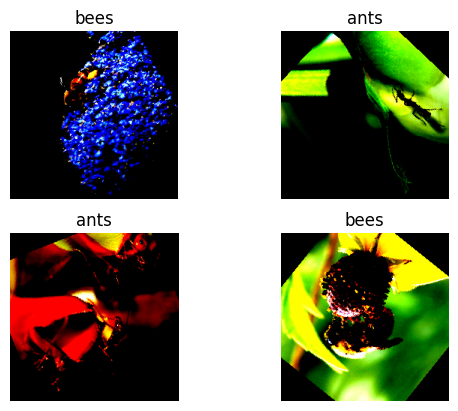

In [68]:
#plot some images with labels
train_iter=iter(train_dataloader)
images,labels,class_labels=next(train_iter)
print(f"images.shape: {images.shape}, labels.shape: {labels.shape}, class labels are: {class_labels}")
# print(images.shape,labels.shape) #batch_size=4 images of 3 RGB channels, img_dim=224, corresponding labels

for i in range(batch_size):
    plt.subplot(int(batch_size/2),int(batch_size/2),i+1)
    img=images[i]
    img=img.numpy()
    img=img.transpose(1,2,0)
    plt.imshow(img)
    plt.title(class_labels[i])
    plt.axis("off")
    
plt.show()

but for BCELoss, does it implement the sigmoid function?
ChatGPT
No, the nn.BCELoss() in PyTorch does not include the sigmoid function. Unlike nn.CrossEntropyLoss(), which combines the softmax activation and the cross-entropy loss, nn.BCELoss() expects the input logits to be passed through a sigmoid activation function before calculating the binary cross-entropy loss.

In [72]:
#create simple custom model for debugging
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(3,6,5) #3 rgb input channels, set 6 output channels, kernel size 5x5
#        torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.pool1=nn.MaxPool2d(2,2) #kernel size 2, stride 2
        self.conv2=nn.Conv2d(6,16,5) #input size must be same as previous conv output size
        self.pool2=nn.MaxPool2d(2,2) #kernel size 2, stride 2
        #to get 16*5*5 can print out the diff layers output manualy first
        self.fc1=nn.Linear(16*53*53,1200)
        self.fc2=nn.Linear(1200,84)
#         self.fc3=nn.Linear(84,num_classes)
        self.fc3=nn.Linear(84,1) #1 since using BCELoss, if using CrossEntropyLoss then 2 since its considered multiclass
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
#         print(1,x.shape)
        out=self.pool1(F.relu(self.conv1(x)))
#         print(2,out.shape)
        out=self.pool2(F.relu(self.conv2(out)))
#         print(3,out.shape)
        #flatten
        out=out.view(-1,16*53*53)
#         print(4,out.shape)
        out=F.relu(self.fc1(out))
#         print(5,out.shape)
        out=F.relu(self.fc2(out))
#         print(6,out.shape)
        out=self.fc3(out)
#         print(7,out.shape)
        predicted_prob=self.sigmoid(out)
        #softmax already included in the loss function so dont need here
        return out
    
num_inputs=img_dim**2
hidden_layers1=4096
hidden_layers2=128
num_classes=len(train_data.class_names)
# model=CustomModel(num_inputs,hidden_layers1,hidden_layers2,num_classes)
model=ConvNet()

criterion=nn.BCELoss()
lr=1e-3
optimizer=torch.optim.Adam(
    model.parameters(),
    lr=lr
)

model

In [3]:
#use pretrained 
model=torchvision.models.resnet18(pretrained=True)
num_input_ftrs=model.fc.in_features #final linear layer
model.fc=nn.Linear(in_features=num_input_ftrs,out_features=1)

lr=1e-3
criterion=nn.BCELoss() #need to implement sigmoid after model(images)
optimizer=torch.optim.Adam(
    model.parameters(),
    lr=lr
)

C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Palaash.HPZ\anaconda3\envs\pytorch_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
def get_accuracy(outputs,labels): #accuracy function changes with task, this is for binary image classification
    #get num_correct/num_labels
    threshold=0.5
    predicted_classes=[1 if x>=threshold else 0 for x in outputs] #after sigmoid function, output probabilities>=threshold is assigned class 1, else 0
    correct_predictions=[1 if predicted_classes[i]==labels[i] else 0 for i in range(len(labels))]
    num_correct=sum(correct_predictions) #will give number of ones inside since sum+0=sum
    return num_correct/len(labels)*100

In [15]:
num_epochs=1000
print_how_many_training_steps=2

start_time=time.time()
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
model.to(device)

#training loop
# to device
# forward pass
# calc loss
# zero grad of optimizer
# calc gradients of loss fn
# update weights of optimizer


#validation loop
# to device
# forward pass
# calc loss

print("########## Start Training loop  ##########")
trg_logs={"loss":[],"acc":[]}
val_logs={"loss":[],"acc":[]}
for epoch in range(num_epochs):
    print("-"*30)
    print(f"Epoch {epoch+1}/{num_epochs}")
    running_training_loss,running_training_acc=[],[]
    running_validation_loss,running_validation_acc=[],[]
    for i,(images,labels,class_names) in enumerate(train_dataloader):
#         print(images.shape,labels.shape,class_names)
#         images=images.reshape((4,3,img_dim**2))
        labels=labels.reshape((-1,1))
#         print(images.shape,labels.shape,class_names)
        images=images.to(device)
        labels=labels.to(device).float()
        outputs=model.forward(images)
        outputs=nn.Sigmoid()(outputs)
#         print(outputs.shape,labels.shape)
#         print(type(outputs),type(labels))
#         print(outputs)
#         print(labels)
        trg_loss=criterion(outputs,labels)
        running_training_loss.append(trg_loss.item())
        optimizer.zero_grad()
        trg_loss.backward()
        optimizer.step()
        trg_acc=get_accuracy(outputs,labels)
        running_training_acc.append(trg_acc)
        
        print_divisor=1/(print_how_many_training_steps+1)
        if i%int(len(train_dataloader)*print_divisor)==0:
            if i==0 or i==len(train_dataloader)-1:
                continue
            else:
                print(f"Step {(i+1)}/{len(train_dataloader)}: training loss: {np.mean(running_training_loss):.4f}, training acc: {np.mean(running_training_acc):.4f}, time elapsed: {(time.time()-start_time):.4f}")

        
    for i,(images,labels,class_names) in enumerate(val_dataloader):
        labels=labels.reshape((-1,1)).float()
        images=images.to(device)
        labels=labels.to(device)
        outputs=model(images)
        outputs=nn.Sigmoid()(outputs)
        val_loss=criterion(outputs,labels)
        val_acc=get_accuracy(outputs,labels)
        running_validation_loss.append(val_loss.item())
        running_validation_acc.append(val_acc)

        
    epoch_mean_trg_loss=np.mean(running_training_loss)
    epoch_mean_trg_acc=np.mean(running_training_acc)
    epoch_mean_val_loss=np.mean(running_validation_loss)
    epoch_mean_val_acc=np.mean(running_validation_acc)
    trg_logs["loss"].append(epoch_mean_trg_loss)
    trg_logs["acc"].append(epoch_mean_trg_acc)
    val_logs["loss"].append(epoch_mean_val_loss)
    val_logs["acc"].append(epoch_mean_val_acc)
    print(f"End of epoch {epoch+1}/{num_epochs}")
    print(f"training loss: {epoch_mean_trg_loss:.4f}, training acc: {epoch_mean_trg_acc:.4f}, validation loss: {epoch_mean_val_loss:.4f}, validation acc: {epoch_mean_val_acc:.4f}, time elapsed: {(time.time()-start_time):.4f}")
    
print("-"*30)
print("########## Training loop completed ##########")
print("total time taken: ",time.time()-start_time)

########## Start Training loop  ##########
------------------------------
Epoch 1/1000
Step 21/61: training loss: 0.5632, training acc: 72.6190, time elapsed: 1.1267
Step 41/61: training loss: 0.5853, training acc: 73.7805, time elapsed: 2.0767
End of epoch 1/1000
training loss: 0.5761, training acc: 72.5410, validation loss: 0.8255, validation acc: 53.9474, time elapsed: 4.0610
------------------------------
Epoch 2/1000
Step 21/61: training loss: 0.5111, training acc: 78.5714, time elapsed: 5.0143
Step 41/61: training loss: 0.4970, training acc: 79.2683, time elapsed: 5.9715
End of epoch 2/1000
training loss: 0.5203, training acc: 77.4590, validation loss: 0.9039, validation acc: 50.0000, time elapsed: 7.9858
------------------------------
Epoch 3/1000
Step 21/61: training loss: 0.5318, training acc: 76.1905, time elapsed: 8.8936
Step 41/61: training loss: 0.5212, training acc: 74.3902, time elapsed: 9.7885
End of epoch 3/1000
training loss: 0.5174, training acc: 74.1803, validation 

Step 21/61: training loss: 0.3972, training acc: 84.5238, time elapsed: 93.7934
Step 41/61: training loss: 0.5882, training acc: 73.7805, time elapsed: 94.7373
End of epoch 25/1000
training loss: 0.5629, training acc: 74.1803, validation loss: 0.8134, validation acc: 52.6316, time elapsed: 96.7954
------------------------------
Epoch 26/1000
Step 21/61: training loss: 0.4586, training acc: 79.7619, time elapsed: 97.7625
Step 41/61: training loss: 0.4342, training acc: 81.0976, time elapsed: 98.7396
End of epoch 26/1000
training loss: 0.4391, training acc: 80.7377, validation loss: 1.0376, validation acc: 48.6842, time elapsed: 100.6197
------------------------------
Epoch 27/1000
Step 21/61: training loss: 0.5579, training acc: 77.3810, time elapsed: 101.5353
Step 41/61: training loss: 0.4998, training acc: 79.8780, time elapsed: 102.3962
End of epoch 27/1000
training loss: 0.4802, training acc: 80.7377, validation loss: 0.9197, validation acc: 56.5789, time elapsed: 104.3021
---------

Step 21/61: training loss: 0.4740, training acc: 78.5714, time elapsed: 185.5583
Step 41/61: training loss: 0.4696, training acc: 78.6585, time elapsed: 186.4902
End of epoch 49/1000
training loss: 0.4584, training acc: 78.2787, validation loss: 0.9135, validation acc: 53.2895, time elapsed: 188.5207
------------------------------
Epoch 50/1000
Step 21/61: training loss: 0.4939, training acc: 79.7619, time elapsed: 189.5267
Step 41/61: training loss: 0.4797, training acc: 79.8780, time elapsed: 190.4152
End of epoch 50/1000
training loss: 0.4847, training acc: 78.2787, validation loss: 0.9329, validation acc: 54.6053, time elapsed: 192.4389
------------------------------
Epoch 51/1000
Step 21/61: training loss: 0.4644, training acc: 78.5714, time elapsed: 193.4099
Step 41/61: training loss: 0.4793, training acc: 78.0488, time elapsed: 194.3409
End of epoch 51/1000
training loss: 0.5069, training acc: 75.8197, validation loss: 0.8536, validation acc: 51.3158, time elapsed: 196.2634
----

Step 21/61: training loss: 0.4979, training acc: 77.3810, time elapsed: 278.3247
Step 41/61: training loss: 0.4711, training acc: 79.8780, time elapsed: 279.1678
End of epoch 73/1000
training loss: 0.4848, training acc: 79.5082, validation loss: 0.8652, validation acc: 51.3158, time elapsed: 281.1014
------------------------------
Epoch 74/1000
Step 21/61: training loss: 0.4622, training acc: 77.3810, time elapsed: 282.1144
Step 41/61: training loss: 0.4291, training acc: 80.4878, time elapsed: 282.9894
End of epoch 74/1000
training loss: 0.4435, training acc: 80.7377, validation loss: 1.1365, validation acc: 50.0000, time elapsed: 284.8593
------------------------------
Epoch 75/1000
Step 21/61: training loss: 0.4393, training acc: 78.5714, time elapsed: 285.8318
Step 41/61: training loss: 0.4184, training acc: 82.3171, time elapsed: 286.6864
End of epoch 75/1000
training loss: 0.4303, training acc: 80.3279, validation loss: 0.9840, validation acc: 50.0000, time elapsed: 288.7616
----

Step 21/61: training loss: 0.3829, training acc: 84.5238, time elapsed: 371.2209
Step 41/61: training loss: 0.4038, training acc: 83.5366, time elapsed: 372.1269
End of epoch 97/1000
training loss: 0.3770, training acc: 84.0164, validation loss: 0.8793, validation acc: 58.5526, time elapsed: 374.1651
------------------------------
Epoch 98/1000
Step 21/61: training loss: 0.3364, training acc: 83.3333, time elapsed: 375.1137
Step 41/61: training loss: 0.3955, training acc: 80.4878, time elapsed: 376.0136
End of epoch 98/1000
training loss: 0.4082, training acc: 80.3279, validation loss: 0.8656, validation acc: 60.5263, time elapsed: 378.0904
------------------------------
Epoch 99/1000
Step 21/61: training loss: 0.4153, training acc: 80.9524, time elapsed: 378.9615
Step 41/61: training loss: 0.3693, training acc: 84.7561, time elapsed: 379.8530
End of epoch 99/1000
training loss: 0.3410, training acc: 86.0656, validation loss: 0.8776, validation acc: 66.4474, time elapsed: 381.9115
----

Step 21/61: training loss: 0.2826, training acc: 86.9048, time elapsed: 465.0283
Step 41/61: training loss: 0.2790, training acc: 86.5854, time elapsed: 466.0056
End of epoch 121/1000
training loss: 0.2877, training acc: 86.8852, validation loss: 0.9702, validation acc: 62.5000, time elapsed: 468.0666
------------------------------
Epoch 122/1000
Step 21/61: training loss: 0.2451, training acc: 90.4762, time elapsed: 469.1027
Step 41/61: training loss: 0.2900, training acc: 88.4146, time elapsed: 470.0832
End of epoch 122/1000
training loss: 0.3063, training acc: 87.7049, validation loss: 1.0903, validation acc: 61.1842, time elapsed: 472.0344
------------------------------
Epoch 123/1000
Step 21/61: training loss: 0.1915, training acc: 90.4762, time elapsed: 472.9712
Step 41/61: training loss: 0.2616, training acc: 87.8049, time elapsed: 473.8546
End of epoch 123/1000
training loss: 0.2522, training acc: 88.1148, validation loss: 0.9598, validation acc: 59.2105, time elapsed: 476.0989

Step 21/61: training loss: 0.2468, training acc: 88.0952, time elapsed: 559.7115
Step 41/61: training loss: 0.2334, training acc: 90.2439, time elapsed: 560.6235
End of epoch 145/1000
training loss: 0.2347, training acc: 90.5738, validation loss: 0.9047, validation acc: 67.1053, time elapsed: 562.6967
------------------------------
Epoch 146/1000
Step 21/61: training loss: 0.3075, training acc: 82.1429, time elapsed: 563.7164
Step 41/61: training loss: 0.2737, training acc: 86.5854, time elapsed: 564.6316
End of epoch 146/1000
training loss: 0.2662, training acc: 87.2951, validation loss: 0.9586, validation acc: 63.8158, time elapsed: 566.6302
------------------------------
Epoch 147/1000
Step 21/61: training loss: 0.2896, training acc: 88.0952, time elapsed: 567.5588
Step 41/61: training loss: 0.2591, training acc: 89.0244, time elapsed: 568.4979
End of epoch 147/1000
training loss: 0.2581, training acc: 89.3443, validation loss: 0.8880, validation acc: 65.1316, time elapsed: 570.5290

Step 21/61: training loss: 0.1879, training acc: 90.4762, time elapsed: 654.5694
Step 41/61: training loss: 0.1707, training acc: 92.6829, time elapsed: 655.4662
End of epoch 169/1000
training loss: 0.1780, training acc: 92.6230, validation loss: 1.0887, validation acc: 66.4474, time elapsed: 657.4332
------------------------------
Epoch 170/1000
Step 21/61: training loss: 0.2367, training acc: 90.4762, time elapsed: 658.3793
Step 41/61: training loss: 0.2443, training acc: 92.0732, time elapsed: 659.2583
End of epoch 170/1000
training loss: 0.2333, training acc: 92.2131, validation loss: 1.1765, validation acc: 64.4737, time elapsed: 661.2372
------------------------------
Epoch 171/1000
Step 21/61: training loss: 0.2132, training acc: 90.4762, time elapsed: 662.2135
Step 41/61: training loss: 0.2031, training acc: 91.4634, time elapsed: 663.2134
End of epoch 171/1000
training loss: 0.1901, training acc: 92.2131, validation loss: 0.9378, validation acc: 68.4211, time elapsed: 665.2061

Step 21/61: training loss: 0.2195, training acc: 91.6667, time elapsed: 747.9490
Step 41/61: training loss: 0.1747, training acc: 92.6829, time elapsed: 748.8647
End of epoch 193/1000
training loss: 0.1787, training acc: 92.2131, validation loss: 1.0520, validation acc: 66.4474, time elapsed: 751.0331
------------------------------
Epoch 194/1000
Step 21/61: training loss: 0.1232, training acc: 94.0476, time elapsed: 751.9963
Step 41/61: training loss: 0.1859, training acc: 89.6341, time elapsed: 752.9540
End of epoch 194/1000
training loss: 0.1649, training acc: 90.9836, validation loss: 1.1140, validation acc: 65.1316, time elapsed: 754.9959
------------------------------
Epoch 195/1000
Step 21/61: training loss: 0.1280, training acc: 95.2381, time elapsed: 755.9341
Step 41/61: training loss: 0.1300, training acc: 95.1220, time elapsed: 756.9117
End of epoch 195/1000
training loss: 0.1914, training acc: 93.4426, validation loss: 0.8385, validation acc: 67.7632, time elapsed: 758.9485

Step 21/61: training loss: 0.1625, training acc: 91.6667, time elapsed: 843.3356
Step 41/61: training loss: 0.1436, training acc: 93.2927, time elapsed: 844.2502
End of epoch 217/1000
training loss: 0.1490, training acc: 93.4426, validation loss: 1.1664, validation acc: 67.1053, time elapsed: 846.1330
------------------------------
Epoch 218/1000
Step 21/61: training loss: 0.2344, training acc: 91.6667, time elapsed: 847.1388
Step 41/61: training loss: 0.2753, training acc: 86.5854, time elapsed: 848.0565
End of epoch 218/1000
training loss: 0.2463, training acc: 88.1148, validation loss: 1.1496, validation acc: 67.7632, time elapsed: 850.0188
------------------------------
Epoch 219/1000
Step 21/61: training loss: 0.1205, training acc: 95.2381, time elapsed: 851.0454
Step 41/61: training loss: 0.1628, training acc: 93.2927, time elapsed: 852.0386
End of epoch 219/1000
training loss: 0.1596, training acc: 93.4426, validation loss: 1.0099, validation acc: 68.4211, time elapsed: 853.9809

Step 21/61: training loss: 0.1413, training acc: 94.0476, time elapsed: 936.8083
Step 41/61: training loss: 0.1176, training acc: 95.7317, time elapsed: 937.7254
End of epoch 241/1000
training loss: 0.1225, training acc: 94.2623, validation loss: 1.1343, validation acc: 72.3684, time elapsed: 939.7728
------------------------------
Epoch 242/1000
Step 21/61: training loss: 0.1823, training acc: 95.2381, time elapsed: 940.7012
Step 41/61: training loss: 0.1456, training acc: 95.1220, time elapsed: 941.6637
End of epoch 242/1000
training loss: 0.1784, training acc: 93.4426, validation loss: 1.6563, validation acc: 66.4474, time elapsed: 943.6550
------------------------------
Epoch 243/1000
Step 21/61: training loss: 0.3773, training acc: 86.9048, time elapsed: 944.6283
Step 41/61: training loss: 0.2768, training acc: 89.6341, time elapsed: 945.6798
End of epoch 243/1000
training loss: 0.2526, training acc: 89.7541, validation loss: 0.8814, validation acc: 73.0263, time elapsed: 947.6170

End of epoch 264/1000
training loss: 0.0968, training acc: 96.7213, validation loss: 1.0068, validation acc: 72.3684, time elapsed: 1030.5466
------------------------------
Epoch 265/1000
Step 21/61: training loss: 0.1243, training acc: 95.2381, time elapsed: 1031.5390
Step 41/61: training loss: 0.1371, training acc: 94.5122, time elapsed: 1032.5074
End of epoch 265/1000
training loss: 0.1069, training acc: 95.9016, validation loss: 1.0953, validation acc: 69.0789, time elapsed: 1034.4914
------------------------------
Epoch 266/1000
Step 21/61: training loss: 0.0777, training acc: 98.8095, time elapsed: 1035.5108
Step 41/61: training loss: 0.0847, training acc: 98.1707, time elapsed: 1036.4768
End of epoch 266/1000
training loss: 0.1637, training acc: 95.4918, validation loss: 1.5831, validation acc: 68.4211, time elapsed: 1038.5068
------------------------------
Epoch 267/1000
Step 21/61: training loss: 0.2390, training acc: 89.2857, time elapsed: 1039.5690
Step 41/61: training loss:

Step 21/61: training loss: 0.1659, training acc: 96.4286, time elapsed: 1120.9030
Step 41/61: training loss: 0.1565, training acc: 94.5122, time elapsed: 1121.8720
End of epoch 288/1000
training loss: 0.1341, training acc: 95.4918, validation loss: 1.1573, validation acc: 64.4737, time elapsed: 1123.8899
------------------------------
Epoch 289/1000
Step 21/61: training loss: 0.0877, training acc: 98.8095, time elapsed: 1124.8639
Step 41/61: training loss: 0.0641, training acc: 98.7805, time elapsed: 1125.7657
End of epoch 289/1000
training loss: 0.1232, training acc: 97.1311, validation loss: 1.2187, validation acc: 67.1053, time elapsed: 1127.8677
------------------------------
Epoch 290/1000
Step 21/61: training loss: 0.1280, training acc: 96.4286, time elapsed: 1128.7924
Step 41/61: training loss: 0.1001, training acc: 96.9512, time elapsed: 1129.8132
End of epoch 290/1000
training loss: 0.1978, training acc: 92.2131, validation loss: 0.9195, validation acc: 71.0526, time elapsed: 

End of epoch 311/1000
training loss: 0.0979, training acc: 95.4918, validation loss: 1.4192, validation acc: 65.7895, time elapsed: 1213.5357
------------------------------
Epoch 312/1000
Step 21/61: training loss: 0.1287, training acc: 94.0476, time elapsed: 1214.4531
Step 41/61: training loss: 0.0789, training acc: 96.3415, time elapsed: 1215.3242
End of epoch 312/1000
training loss: 0.0728, training acc: 97.1311, validation loss: 1.1724, validation acc: 69.0789, time elapsed: 1217.3483
------------------------------
Epoch 313/1000
Step 21/61: training loss: 0.0883, training acc: 96.4286, time elapsed: 1218.3209
Step 41/61: training loss: 0.1273, training acc: 95.7317, time elapsed: 1219.1857
End of epoch 313/1000
training loss: 0.1272, training acc: 95.0820, validation loss: 0.7574, validation acc: 76.3158, time elapsed: 1221.2554
------------------------------
Epoch 314/1000
Step 21/61: training loss: 0.0436, training acc: 100.0000, time elapsed: 1222.2954
Step 41/61: training loss

Step 21/61: training loss: 0.1368, training acc: 94.0476, time elapsed: 1304.7732
Step 41/61: training loss: 0.1422, training acc: 94.5122, time elapsed: 1305.7105
End of epoch 335/1000
training loss: 0.1743, training acc: 93.4426, validation loss: 1.0477, validation acc: 71.0526, time elapsed: 1307.7097
------------------------------
Epoch 336/1000
Step 21/61: training loss: 0.1466, training acc: 94.0476, time elapsed: 1308.6666
Step 41/61: training loss: 0.1677, training acc: 92.6829, time elapsed: 1309.5289
End of epoch 336/1000
training loss: 0.1434, training acc: 94.6721, validation loss: 0.9496, validation acc: 73.0263, time elapsed: 1311.4430
------------------------------
Epoch 337/1000
Step 21/61: training loss: 0.0553, training acc: 98.8095, time elapsed: 1312.4435
Step 41/61: training loss: 0.0466, training acc: 99.3902, time elapsed: 1313.3452
End of epoch 337/1000
training loss: 0.0508, training acc: 99.1803, validation loss: 1.0903, validation acc: 71.0526, time elapsed: 

End of epoch 358/1000
training loss: 0.0594, training acc: 97.1311, validation loss: 1.3485, validation acc: 72.3684, time elapsed: 1397.0458
------------------------------
Epoch 359/1000
Step 21/61: training loss: 0.0690, training acc: 95.2381, time elapsed: 1398.0204
Step 41/61: training loss: 0.0781, training acc: 95.7317, time elapsed: 1398.9076
End of epoch 359/1000
training loss: 0.1043, training acc: 94.6721, validation loss: 1.0465, validation acc: 73.6842, time elapsed: 1400.9295
------------------------------
Epoch 360/1000
Step 21/61: training loss: 0.0218, training acc: 98.8095, time elapsed: 1401.9023
Step 41/61: training loss: 0.0848, training acc: 96.9512, time elapsed: 1402.8517
End of epoch 360/1000
training loss: 0.0795, training acc: 97.1311, validation loss: 0.9145, validation acc: 74.3421, time elapsed: 1404.8732
------------------------------
Epoch 361/1000
Step 21/61: training loss: 0.0861, training acc: 95.2381, time elapsed: 1405.8544
Step 41/61: training loss:

Step 21/61: training loss: 0.1416, training acc: 95.2381, time elapsed: 1485.5085
Step 41/61: training loss: 0.1251, training acc: 96.3415, time elapsed: 1486.4464
End of epoch 382/1000
training loss: 0.0924, training acc: 97.1311, validation loss: 1.2786, validation acc: 71.7105, time elapsed: 1488.4634
------------------------------
Epoch 383/1000
Step 21/61: training loss: 0.0330, training acc: 100.0000, time elapsed: 1489.4042
Step 41/61: training loss: 0.0233, training acc: 100.0000, time elapsed: 1490.3196
End of epoch 383/1000
training loss: 0.0303, training acc: 99.5902, validation loss: 1.2890, validation acc: 71.7105, time elapsed: 1492.2647
------------------------------
Epoch 384/1000
Step 21/61: training loss: 0.0145, training acc: 100.0000, time elapsed: 1493.1844
Step 41/61: training loss: 0.0301, training acc: 98.7805, time elapsed: 1494.0332
End of epoch 384/1000
training loss: 0.0367, training acc: 98.3607, validation loss: 1.1583, validation acc: 69.7368, time elapse

End of epoch 405/1000
training loss: 0.0738, training acc: 97.9508, validation loss: 1.0686, validation acc: 71.0526, time elapsed: 1576.0944
------------------------------
Epoch 406/1000
Step 21/61: training loss: 0.0815, training acc: 95.2381, time elapsed: 1577.0332
Step 41/61: training loss: 0.0544, training acc: 97.5610, time elapsed: 1577.9448
End of epoch 406/1000
training loss: 0.0423, training acc: 98.3607, validation loss: 1.2644, validation acc: 73.0263, time elapsed: 1579.9121
------------------------------
Epoch 407/1000
Step 21/61: training loss: 0.0220, training acc: 98.8095, time elapsed: 1580.7980
Step 41/61: training loss: 0.0172, training acc: 99.3902, time elapsed: 1581.7340
End of epoch 407/1000
training loss: 0.0272, training acc: 99.1803, validation loss: 1.1792, validation acc: 71.7105, time elapsed: 1583.6094
------------------------------
Epoch 408/1000
Step 21/61: training loss: 0.0491, training acc: 96.4286, time elapsed: 1584.5145
Step 41/61: training loss:

Step 21/61: training loss: 0.0826, training acc: 97.6190, time elapsed: 1665.6662
Step 41/61: training loss: 0.0768, training acc: 97.5610, time elapsed: 1666.5862
End of epoch 429/1000
training loss: 0.0650, training acc: 97.9508, validation loss: 1.1502, validation acc: 73.0263, time elapsed: 1668.4996
------------------------------
Epoch 430/1000
Step 21/61: training loss: 0.0582, training acc: 98.8095, time elapsed: 1669.4932
Step 41/61: training loss: 0.0409, training acc: 99.3902, time elapsed: 1670.3974
End of epoch 430/1000
training loss: 0.0317, training acc: 99.5902, validation loss: 1.3366, validation acc: 71.7105, time elapsed: 1672.4027
------------------------------
Epoch 431/1000
Step 21/61: training loss: 0.0322, training acc: 98.8095, time elapsed: 1673.2942
Step 41/61: training loss: 0.0636, training acc: 98.7805, time elapsed: 1674.1626
End of epoch 431/1000
training loss: 0.0643, training acc: 97.9508, validation loss: 1.5433, validation acc: 69.7368, time elapsed: 

End of epoch 452/1000
training loss: 0.0565, training acc: 96.7213, validation loss: 1.7628, validation acc: 68.4211, time elapsed: 1757.8706
------------------------------
Epoch 453/1000
Step 21/61: training loss: 0.1375, training acc: 95.2381, time elapsed: 1758.9462
Step 41/61: training loss: 0.2204, training acc: 95.1220, time elapsed: 1759.8572
End of epoch 453/1000
training loss: 0.1902, training acc: 95.0820, validation loss: 1.4581, validation acc: 69.0789, time elapsed: 1761.7574
------------------------------
Epoch 454/1000
Step 21/61: training loss: 0.0332, training acc: 98.8095, time elapsed: 1762.7272
Step 41/61: training loss: 0.0309, training acc: 99.3902, time elapsed: 1763.6052
End of epoch 454/1000
training loss: 0.0965, training acc: 97.5410, validation loss: 1.3169, validation acc: 67.1053, time elapsed: 1765.5752
------------------------------
Epoch 455/1000
Step 21/61: training loss: 0.0492, training acc: 97.6190, time elapsed: 1766.4780
Step 41/61: training loss:

Step 21/61: training loss: 0.0350, training acc: 98.8095, time elapsed: 1848.0062
Step 41/61: training loss: 0.0636, training acc: 97.5610, time elapsed: 1848.8778
End of epoch 476/1000
training loss: 0.0551, training acc: 97.9508, validation loss: 1.2399, validation acc: 75.0000, time elapsed: 1850.8133
------------------------------
Epoch 477/1000
Step 21/61: training loss: 0.0533, training acc: 98.8095, time elapsed: 1851.7593
Step 41/61: training loss: 0.0473, training acc: 98.7805, time elapsed: 1852.7038
End of epoch 477/1000
training loss: 0.0476, training acc: 98.3607, validation loss: 0.9996, validation acc: 76.3158, time elapsed: 1854.6387
------------------------------
Epoch 478/1000
Step 21/61: training loss: 0.0666, training acc: 96.4286, time elapsed: 1855.6317
Step 41/61: training loss: 0.0763, training acc: 96.9512, time elapsed: 1856.5420
End of epoch 478/1000
training loss: 0.0741, training acc: 97.5410, validation loss: 1.1215, validation acc: 71.0526, time elapsed: 

End of epoch 499/1000
training loss: 0.0403, training acc: 97.9508, validation loss: 1.0414, validation acc: 74.3421, time elapsed: 1940.8403
------------------------------
Epoch 500/1000
Step 21/61: training loss: 0.0849, training acc: 96.4286, time elapsed: 1941.9117
Step 41/61: training loss: 0.0630, training acc: 97.5610, time elapsed: 1942.7833
End of epoch 500/1000
training loss: 0.0477, training acc: 98.3607, validation loss: 1.0580, validation acc: 73.6842, time elapsed: 1944.8566
------------------------------
Epoch 501/1000
Step 21/61: training loss: 0.0194, training acc: 100.0000, time elapsed: 1945.9086
Step 41/61: training loss: 0.0132, training acc: 100.0000, time elapsed: 1946.7984
End of epoch 501/1000
training loss: 0.0266, training acc: 99.1803, validation loss: 1.2134, validation acc: 72.3684, time elapsed: 1948.7637
------------------------------
Epoch 502/1000
Step 21/61: training loss: 0.0057, training acc: 100.0000, time elapsed: 1949.7825
Step 41/61: training lo

Step 21/61: training loss: 0.1007, training acc: 94.0476, time elapsed: 2033.8368
Step 41/61: training loss: 0.0584, training acc: 96.9512, time elapsed: 2034.9456
End of epoch 523/1000
training loss: 0.0782, training acc: 97.1311, validation loss: 1.0361, validation acc: 73.6842, time elapsed: 2037.2436
------------------------------
Epoch 524/1000
Step 21/61: training loss: 0.0595, training acc: 98.8095, time elapsed: 2038.3332
Step 41/61: training loss: 0.0472, training acc: 98.7805, time elapsed: 2039.3852
End of epoch 524/1000
training loss: 0.0371, training acc: 99.1803, validation loss: 0.9424, validation acc: 75.0000, time elapsed: 2041.6321
------------------------------
Epoch 525/1000
Step 21/61: training loss: 0.0506, training acc: 98.8095, time elapsed: 2042.7183
Step 41/61: training loss: 0.0350, training acc: 98.7805, time elapsed: 2043.8171
End of epoch 525/1000
training loss: 0.0280, training acc: 99.1803, validation loss: 1.0556, validation acc: 75.6579, time elapsed: 

End of epoch 546/1000
training loss: 0.0443, training acc: 98.3607, validation loss: 1.1264, validation acc: 65.7895, time elapsed: 2137.2682
------------------------------
Epoch 547/1000
Step 21/61: training loss: 0.0436, training acc: 98.8095, time elapsed: 2138.4178
Step 41/61: training loss: 0.0774, training acc: 97.5610, time elapsed: 2139.3754
End of epoch 547/1000
training loss: 0.0848, training acc: 97.5410, validation loss: 1.4283, validation acc: 68.4211, time elapsed: 2141.5960
------------------------------
Epoch 548/1000
Step 21/61: training loss: 0.1073, training acc: 96.4286, time elapsed: 2142.5691
Step 41/61: training loss: 0.0895, training acc: 97.5610, time elapsed: 2143.6284
End of epoch 548/1000
training loss: 0.0825, training acc: 97.5410, validation loss: 1.1845, validation acc: 71.7105, time elapsed: 2145.7965
------------------------------
Epoch 549/1000
Step 21/61: training loss: 0.0848, training acc: 96.4286, time elapsed: 2146.7702
Step 41/61: training loss:

Step 21/61: training loss: 0.0247, training acc: 98.8095, time elapsed: 2237.7795
Step 41/61: training loss: 0.0588, training acc: 96.3415, time elapsed: 2238.6982
End of epoch 570/1000
training loss: 0.0591, training acc: 96.7213, validation loss: 1.5244, validation acc: 67.7632, time elapsed: 2241.1455
------------------------------
Epoch 571/1000
Step 21/61: training loss: 0.1001, training acc: 97.6190, time elapsed: 2242.2573
Step 41/61: training loss: 0.1066, training acc: 96.9512, time elapsed: 2243.2784
End of epoch 571/1000
training loss: 0.0947, training acc: 96.7213, validation loss: 0.7764, validation acc: 78.2895, time elapsed: 2245.6134
------------------------------
Epoch 572/1000
Step 21/61: training loss: 0.0936, training acc: 97.6190, time elapsed: 2246.5436
Step 41/61: training loss: 0.0711, training acc: 97.5610, time elapsed: 2247.4777
End of epoch 572/1000
training loss: 0.0618, training acc: 97.5410, validation loss: 0.8356, validation acc: 79.6053, time elapsed: 

Step 41/61: training loss: 0.0592, training acc: 97.5610, time elapsed: 2336.8340
End of epoch 593/1000
training loss: 0.0483, training acc: 98.3607, validation loss: 2.8251, validation acc: 72.3684, time elapsed: 2339.0770
------------------------------
Epoch 594/1000
Step 21/61: training loss: 0.1041, training acc: 96.4286, time elapsed: 2340.2030
Step 41/61: training loss: 0.1470, training acc: 95.1220, time elapsed: 2341.2143
End of epoch 594/1000
training loss: 0.2406, training acc: 91.8033, validation loss: 1.5389, validation acc: 67.1053, time elapsed: 2343.3102
------------------------------
Epoch 595/1000
Step 21/61: training loss: 0.0303, training acc: 100.0000, time elapsed: 2344.6037
Step 41/61: training loss: 0.0409, training acc: 98.7805, time elapsed: 2345.6644
End of epoch 595/1000
training loss: 0.0515, training acc: 97.9508, validation loss: 1.0053, validation acc: 75.6579, time elapsed: 2348.0250
------------------------------
Epoch 596/1000
Step 21/61: training loss

End of epoch 616/1000
training loss: 0.0592, training acc: 97.5410, validation loss: 0.8500, validation acc: 76.9737, time elapsed: 2437.2670
------------------------------
Epoch 617/1000
Step 21/61: training loss: 0.0236, training acc: 98.8095, time elapsed: 2438.2056
Step 41/61: training loss: 0.0630, training acc: 96.3415, time elapsed: 2439.1867
End of epoch 617/1000
training loss: 0.0475, training acc: 97.1311, validation loss: 1.2115, validation acc: 74.3421, time elapsed: 2441.3815
------------------------------
Epoch 618/1000
Step 21/61: training loss: 0.0111, training acc: 100.0000, time elapsed: 2442.3956
Step 41/61: training loss: 0.0630, training acc: 97.5610, time elapsed: 2443.4231
End of epoch 618/1000
training loss: 0.0758, training acc: 97.5410, validation loss: 1.2139, validation acc: 71.0526, time elapsed: 2445.6194
------------------------------
Epoch 619/1000
Step 21/61: training loss: 0.0620, training acc: 96.4286, time elapsed: 2446.8227
Step 41/61: training loss

Step 21/61: training loss: 0.0420, training acc: 98.8095, time elapsed: 2535.8683
Step 41/61: training loss: 0.0320, training acc: 99.3902, time elapsed: 2537.0691
End of epoch 640/1000
training loss: 0.0240, training acc: 99.5902, validation loss: 1.6826, validation acc: 73.6842, time elapsed: 2539.1592
------------------------------
Epoch 641/1000
Step 21/61: training loss: 0.0324, training acc: 98.8095, time elapsed: 2540.2672
Step 41/61: training loss: 0.0620, training acc: 98.1707, time elapsed: 2541.2156
End of epoch 641/1000
training loss: 0.0666, training acc: 97.9508, validation loss: 1.2024, validation acc: 73.6842, time elapsed: 2543.4864
------------------------------
Epoch 642/1000
Step 21/61: training loss: 0.0312, training acc: 98.8095, time elapsed: 2544.4737
Step 41/61: training loss: 0.0859, training acc: 98.1707, time elapsed: 2545.4030
End of epoch 642/1000
training loss: 0.0640, training acc: 98.7705, validation loss: 1.3885, validation acc: 71.0526, time elapsed: 

End of epoch 663/1000
training loss: 0.0286, training acc: 99.1803, validation loss: 1.6966, validation acc: 69.7368, time elapsed: 2635.0826
------------------------------
Epoch 664/1000
Step 21/61: training loss: 0.0870, training acc: 97.6190, time elapsed: 2635.9859
Step 41/61: training loss: 0.0522, training acc: 98.1707, time elapsed: 2636.9274
End of epoch 664/1000
training loss: 0.0458, training acc: 97.9508, validation loss: 1.0353, validation acc: 77.6316, time elapsed: 2638.8854
------------------------------
Epoch 665/1000
Step 21/61: training loss: 0.0219, training acc: 100.0000, time elapsed: 2639.8008
Step 41/61: training loss: 0.0417, training acc: 99.3902, time elapsed: 2640.8222
End of epoch 665/1000
training loss: 0.0376, training acc: 99.1803, validation loss: 0.9918, validation acc: 75.6579, time elapsed: 2642.9688
------------------------------
Epoch 666/1000
Step 21/61: training loss: 0.0168, training acc: 100.0000, time elapsed: 2643.9432
Step 41/61: training los

Step 21/61: training loss: 0.0321, training acc: 98.8095, time elapsed: 2732.4256
Step 41/61: training loss: 0.0215, training acc: 99.3902, time elapsed: 2733.4794
End of epoch 687/1000
training loss: 0.0331, training acc: 98.3607, validation loss: 1.0773, validation acc: 73.6842, time elapsed: 2735.9007
------------------------------
Epoch 688/1000
Step 21/61: training loss: 0.0187, training acc: 100.0000, time elapsed: 2737.0197
Step 41/61: training loss: 0.0364, training acc: 99.3902, time elapsed: 2737.9572
End of epoch 688/1000
training loss: 0.0344, training acc: 99.1803, validation loss: 1.2630, validation acc: 73.0263, time elapsed: 2740.1386
------------------------------
Epoch 689/1000
Step 21/61: training loss: 0.0886, training acc: 96.4286, time elapsed: 2741.3005
Step 41/61: training loss: 0.0493, training acc: 98.1707, time elapsed: 2742.5024
End of epoch 689/1000
training loss: 0.0490, training acc: 98.3607, validation loss: 2.3486, validation acc: 72.3684, time elapsed:

End of epoch 710/1000
training loss: 0.0471, training acc: 99.1803, validation loss: 1.7055, validation acc: 71.0526, time elapsed: 2832.0758
------------------------------
Epoch 711/1000
Step 21/61: training loss: 0.0662, training acc: 97.6190, time elapsed: 2833.0939
Step 41/61: training loss: 0.0448, training acc: 98.7805, time elapsed: 2834.1783
End of epoch 711/1000
training loss: 0.0323, training acc: 99.1803, validation loss: 1.1194, validation acc: 77.6316, time elapsed: 2836.3228
------------------------------
Epoch 712/1000
Step 21/61: training loss: 0.0267, training acc: 97.6190, time elapsed: 2837.3799
Step 41/61: training loss: 0.0232, training acc: 98.1707, time elapsed: 2838.2735
End of epoch 712/1000
training loss: 0.0182, training acc: 98.7705, validation loss: 1.1457, validation acc: 76.3158, time elapsed: 2840.2877
------------------------------
Epoch 713/1000
Step 21/61: training loss: 0.0027, training acc: 100.0000, time elapsed: 2841.2903
Step 41/61: training loss

Step 21/61: training loss: 0.0035, training acc: 100.0000, time elapsed: 2926.7392
Step 41/61: training loss: 0.0060, training acc: 100.0000, time elapsed: 2927.7383
End of epoch 734/1000
training loss: 0.0061, training acc: 100.0000, validation loss: 1.2063, validation acc: 75.6579, time elapsed: 2930.0453
------------------------------
Epoch 735/1000
Step 21/61: training loss: 0.0078, training acc: 100.0000, time elapsed: 2931.1008
Step 41/61: training loss: 0.0048, training acc: 100.0000, time elapsed: 2932.0891
End of epoch 735/1000
training loss: 0.0102, training acc: 99.5902, validation loss: 1.4146, validation acc: 75.6579, time elapsed: 2934.3080
------------------------------
Epoch 736/1000
Step 21/61: training loss: 0.0125, training acc: 98.8095, time elapsed: 2935.3562
Step 41/61: training loss: 0.0199, training acc: 98.7805, time elapsed: 2936.2893
End of epoch 736/1000
training loss: 0.0375, training acc: 98.3607, validation loss: 2.3006, validation acc: 72.3684, time elap

Step 41/61: training loss: 0.0134, training acc: 99.3902, time elapsed: 3025.4444
End of epoch 757/1000
training loss: 0.0106, training acc: 99.5902, validation loss: 1.0458, validation acc: 76.9737, time elapsed: 3027.6001
------------------------------
Epoch 758/1000
Step 21/61: training loss: 0.0090, training acc: 100.0000, time elapsed: 3028.7645
Step 41/61: training loss: 0.0107, training acc: 100.0000, time elapsed: 3029.8476
End of epoch 758/1000
training loss: 0.0091, training acc: 100.0000, validation loss: 1.3867, validation acc: 75.6579, time elapsed: 3032.0268
------------------------------
Epoch 759/1000
Step 21/61: training loss: 0.0204, training acc: 98.8095, time elapsed: 3033.1446
Step 41/61: training loss: 0.0316, training acc: 98.1707, time elapsed: 3034.1399
End of epoch 759/1000
training loss: 0.0456, training acc: 98.3607, validation loss: 1.5677, validation acc: 71.7105, time elapsed: 3036.6064
------------------------------
Epoch 760/1000
Step 21/61: training lo

Step 21/61: training loss: 0.0203, training acc: 98.8095, time elapsed: 3126.9879
Step 41/61: training loss: 0.0174, training acc: 98.7805, time elapsed: 3127.9220
End of epoch 781/1000
training loss: 0.0130, training acc: 99.1803, validation loss: 1.3299, validation acc: 76.3158, time elapsed: 3129.7483
------------------------------
Epoch 782/1000
Step 21/61: training loss: 0.0310, training acc: 98.8095, time elapsed: 3130.6580
Step 41/61: training loss: 0.0285, training acc: 98.7805, time elapsed: 3131.5073
End of epoch 782/1000
training loss: 0.0362, training acc: 98.3607, validation loss: 1.1398, validation acc: 76.3158, time elapsed: 3133.3511
------------------------------
Epoch 783/1000
Step 21/61: training loss: 0.0489, training acc: 98.8095, time elapsed: 3134.2924
Step 41/61: training loss: 0.0401, training acc: 98.7805, time elapsed: 3135.2183
End of epoch 783/1000
training loss: 0.0331, training acc: 98.7705, validation loss: 1.4217, validation acc: 75.0000, time elapsed: 

Step 41/61: training loss: 0.0050, training acc: 100.0000, time elapsed: 3213.4278
End of epoch 804/1000
training loss: 0.0163, training acc: 99.5902, validation loss: 1.1715, validation acc: 71.0526, time elapsed: 3215.3994
------------------------------
Epoch 805/1000
Step 21/61: training loss: 0.0148, training acc: 98.8095, time elapsed: 3216.3087
Step 41/61: training loss: 0.0121, training acc: 99.3902, time elapsed: 3217.1587
End of epoch 805/1000
training loss: 0.0216, training acc: 99.1803, validation loss: 1.0587, validation acc: 75.6579, time elapsed: 3219.1017
------------------------------
Epoch 806/1000
Step 21/61: training loss: 0.0189, training acc: 98.8095, time elapsed: 3219.9916
Step 41/61: training loss: 0.0123, training acc: 99.3902, time elapsed: 3220.8514
End of epoch 806/1000
training loss: 0.0136, training acc: 99.1803, validation loss: 1.2545, validation acc: 75.6579, time elapsed: 3222.7583
------------------------------
Epoch 807/1000
Step 21/61: training loss

End of epoch 827/1000
training loss: 0.0166, training acc: 99.5902, validation loss: 1.5801, validation acc: 72.3684, time elapsed: 3300.8138
------------------------------
Epoch 828/1000
Step 21/61: training loss: 0.0244, training acc: 98.8095, time elapsed: 3301.7362
Step 41/61: training loss: 0.0349, training acc: 98.7805, time elapsed: 3302.6556
End of epoch 828/1000
training loss: 0.0239, training acc: 99.1803, validation loss: 1.6229, validation acc: 71.7105, time elapsed: 3304.6152
------------------------------
Epoch 829/1000
Step 21/61: training loss: 0.0804, training acc: 95.2381, time elapsed: 3305.6404
Step 41/61: training loss: 0.1091, training acc: 96.3415, time elapsed: 3306.4993
End of epoch 829/1000
training loss: 0.0889, training acc: 97.1311, validation loss: 1.0291, validation acc: 73.0263, time elapsed: 3308.4103
------------------------------
Epoch 830/1000
Step 21/61: training loss: 0.0629, training acc: 96.4286, time elapsed: 3309.3110
Step 41/61: training loss:

Step 21/61: training loss: 0.0567, training acc: 97.6190, time elapsed: 3388.7974
Step 41/61: training loss: 0.0331, training acc: 98.7805, time elapsed: 3389.7666
End of epoch 851/1000
training loss: 0.0388, training acc: 98.3607, validation loss: 1.3639, validation acc: 75.0000, time elapsed: 3391.7018
------------------------------
Epoch 852/1000
Step 21/61: training loss: 0.0075, training acc: 100.0000, time elapsed: 3392.6604
Step 41/61: training loss: 0.0271, training acc: 99.3902, time elapsed: 3393.5711
End of epoch 852/1000
training loss: 0.0247, training acc: 99.5902, validation loss: 1.2869, validation acc: 73.6842, time elapsed: 3395.5050
------------------------------
Epoch 853/1000
Step 21/61: training loss: 0.0096, training acc: 100.0000, time elapsed: 3396.5160
Step 41/61: training loss: 0.0107, training acc: 100.0000, time elapsed: 3397.4205
End of epoch 853/1000
training loss: 0.0187, training acc: 99.1803, validation loss: 1.1940, validation acc: 73.6842, time elapse

Step 41/61: training loss: 0.0099, training acc: 99.3902, time elapsed: 3478.7087
End of epoch 874/1000
training loss: 0.0075, training acc: 99.5902, validation loss: 1.4644, validation acc: 74.3421, time elapsed: 3480.6269
------------------------------
Epoch 875/1000
Step 21/61: training loss: 0.0134, training acc: 100.0000, time elapsed: 3481.5184
Step 41/61: training loss: 0.0285, training acc: 99.3902, time elapsed: 3482.3980
End of epoch 875/1000
training loss: 0.0259, training acc: 99.1803, validation loss: 2.0545, validation acc: 74.3421, time elapsed: 3484.3548
------------------------------
Epoch 876/1000
Step 21/61: training loss: 0.0036, training acc: 100.0000, time elapsed: 3485.3120
Step 41/61: training loss: 0.0432, training acc: 98.7805, time elapsed: 3486.1697
End of epoch 876/1000
training loss: 0.0381, training acc: 98.7705, validation loss: 1.3521, validation acc: 76.9737, time elapsed: 3488.2324
------------------------------
Epoch 877/1000
Step 21/61: training los

End of epoch 897/1000
training loss: 0.0079, training acc: 100.0000, validation loss: 1.2334, validation acc: 75.0000, time elapsed: 3569.4227
------------------------------
Epoch 898/1000
Step 21/61: training loss: 0.0442, training acc: 98.8095, time elapsed: 3570.3180
Step 41/61: training loss: 0.0258, training acc: 99.3902, time elapsed: 3571.1668
End of epoch 898/1000
training loss: 0.0248, training acc: 99.1803, validation loss: 1.2283, validation acc: 73.0263, time elapsed: 3573.1250
------------------------------
Epoch 899/1000
Step 21/61: training loss: 0.0351, training acc: 97.6190, time elapsed: 3574.0931
Step 41/61: training loss: 0.0301, training acc: 98.1707, time elapsed: 3575.0940
End of epoch 899/1000
training loss: 0.0225, training acc: 98.7705, validation loss: 1.1961, validation acc: 72.3684, time elapsed: 3577.0168
------------------------------
Epoch 900/1000
Step 21/61: training loss: 0.0050, training acc: 100.0000, time elapsed: 3577.9619
Step 41/61: training los

Step 21/61: training loss: 0.0020, training acc: 100.0000, time elapsed: 3659.1406
Step 41/61: training loss: 0.0072, training acc: 99.3902, time elapsed: 3660.1414
End of epoch 921/1000
training loss: 0.0218, training acc: 98.7705, validation loss: 2.6520, validation acc: 70.3947, time elapsed: 3662.1411
------------------------------
Epoch 922/1000
Step 21/61: training loss: 0.0089, training acc: 100.0000, time elapsed: 3663.0809
Step 41/61: training loss: 0.0059, training acc: 100.0000, time elapsed: 3663.9413
End of epoch 922/1000
training loss: 0.0067, training acc: 100.0000, validation loss: 1.8993, validation acc: 67.1053, time elapsed: 3665.9443
------------------------------
Epoch 923/1000
Step 21/61: training loss: 0.0256, training acc: 98.8095, time elapsed: 3666.8961
Step 41/61: training loss: 0.0260, training acc: 98.7805, time elapsed: 3667.7402
End of epoch 923/1000
training loss: 0.0242, training acc: 98.7705, validation loss: 1.8231, validation acc: 70.3947, time elaps

Step 41/61: training loss: 0.0147, training acc: 100.0000, time elapsed: 3749.0182
End of epoch 944/1000
training loss: 0.0243, training acc: 99.5902, validation loss: 1.4308, validation acc: 73.6842, time elapsed: 3750.9199
------------------------------
Epoch 945/1000
Step 21/61: training loss: 0.0330, training acc: 97.6190, time elapsed: 3751.9209
Step 41/61: training loss: 0.0186, training acc: 98.7805, time elapsed: 3752.7842
End of epoch 945/1000
training loss: 0.0210, training acc: 98.7705, validation loss: 1.3504, validation acc: 73.6842, time elapsed: 3754.8086
------------------------------
Epoch 946/1000
Step 21/61: training loss: 0.0449, training acc: 97.6190, time elapsed: 3755.7782
Step 41/61: training loss: 0.0397, training acc: 98.1707, time elapsed: 3756.7479
End of epoch 946/1000
training loss: 0.0750, training acc: 97.5410, validation loss: 1.6173, validation acc: 72.3684, time elapsed: 3758.6308
------------------------------
Epoch 947/1000
Step 21/61: training loss

End of epoch 967/1000
training loss: 0.0305, training acc: 99.5902, validation loss: 2.2201, validation acc: 71.7105, time elapsed: 3840.6442
------------------------------
Epoch 968/1000
Step 21/61: training loss: 0.0049, training acc: 100.0000, time elapsed: 3841.6178
Step 41/61: training loss: 0.0047, training acc: 100.0000, time elapsed: 3842.5389
End of epoch 968/1000
training loss: 0.0129, training acc: 99.1803, validation loss: 2.1908, validation acc: 72.3684, time elapsed: 3844.5337
------------------------------
Epoch 969/1000
Step 21/61: training loss: 0.0172, training acc: 98.8095, time elapsed: 3845.4951
Step 41/61: training loss: 0.0351, training acc: 98.1707, time elapsed: 3846.3749
End of epoch 969/1000
training loss: 0.0360, training acc: 98.3607, validation loss: 0.9881, validation acc: 76.9737, time elapsed: 3848.3377
------------------------------
Epoch 970/1000
Step 21/61: training loss: 0.0104, training acc: 100.0000, time elapsed: 3849.2647
Step 41/61: training lo

Step 21/61: training loss: 0.0950, training acc: 96.4286, time elapsed: 3929.8918
Step 41/61: training loss: 0.1152, training acc: 96.3415, time elapsed: 3930.8179
End of epoch 991/1000
training loss: 0.1185, training acc: 96.3115, validation loss: 2.3310, validation acc: 71.0526, time elapsed: 3932.8006
------------------------------
Epoch 992/1000
Step 21/61: training loss: 0.1090, training acc: 96.4286, time elapsed: 3933.7201
Step 41/61: training loss: 0.0720, training acc: 97.5610, time elapsed: 3934.6637
End of epoch 992/1000
training loss: 0.0868, training acc: 97.1311, validation loss: 2.6502, validation acc: 69.7368, time elapsed: 3936.6282
------------------------------
Epoch 993/1000
Step 21/61: training loss: 0.0983, training acc: 96.4286, time elapsed: 3937.6160
Step 41/61: training loss: 0.1380, training acc: 95.7317, time elapsed: 3938.5467
End of epoch 993/1000
training loss: 0.1369, training acc: 95.4918, validation loss: 1.2622, validation acc: 72.3684, time elapsed: 

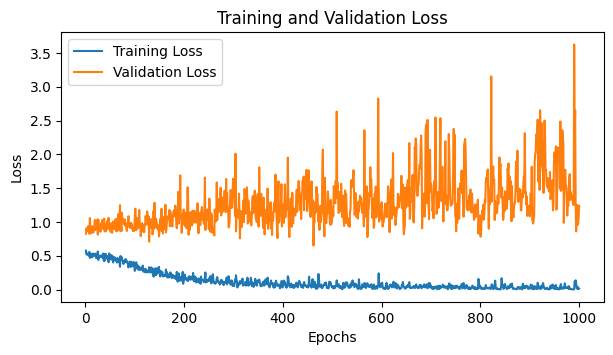

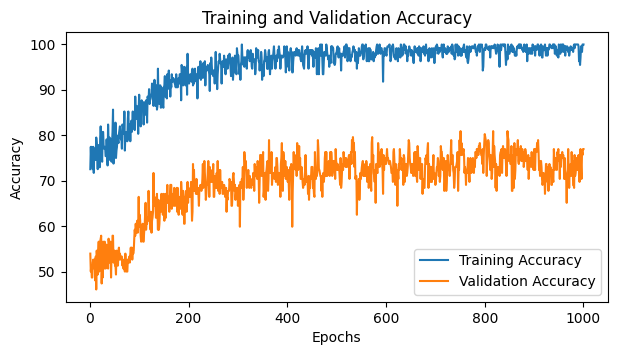

In [102]:
#plot the curves

# Create x-axis values (epochs)
epochs = range(1, num_epochs + 1)

# Plot the training and validation loss
plt.figure(figsize=(7, 3.5))
plt.plot(epochs, trg_logs["loss"], label='Training Loss')
plt.plot(epochs, val_logs["loss"], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(7, 3.5))
plt.plot(epochs, trg_logs["acc"], label='Training Accuracy')
plt.plot(epochs, val_logs["acc"], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# save model
save_path="ants_bees_resnet18.pth"
torch.save(model.state_dict(),save_path)

In [ ]:
# load model
# Load the saved model
model_path="ants_bees_resnet18.pth"

model = CustomModel()  # Instantiate the model
model.load_state_dict(torch.load(model_path))

In [21]:
w=model.state_dict()

The model.state_dict() method in PyTorch returns a dictionary object that maps each parameter name to its corresponding value. You can access the information in the state_dict() using standard dictionary operations.

Here's an example of how to access the information in the state_dict():
#Get the model's state dictionary
state_dict = model.state_dict()

#Access specific parameter values
weights = state_dict['linear.weight']
bias = state_dict['linear.bias']

In this example, linear.weight and linear.bias are the names of specific parameters in your model. You can access other parameters in the same way by providing their respective names.

You can also iterate over the state_dict() to access all parameter names and values:
    
for name, value in state_dict.items():
    print(name, value.shape)

This will print the names of all parameters in the model along with their respective shapes.

Remember that the state_dict() only contains the learned parameters of the model and not other components like buffers or non-learnable parameters.

In [24]:
w.keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn1.num_batches_tracked', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


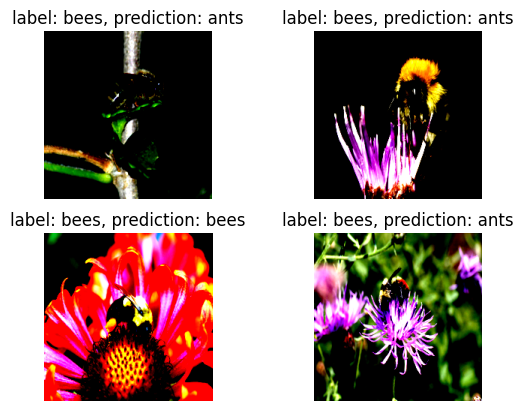

In [104]:
# make predictions

predict_val_dataloader=DataLoader(
    dataset=val_data,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

val_iter=iter(predict_val_dataloader)
images,labels,class_names=next(val_iter)
images=images.to(device)
predictions=model(images)
predictions=nn.Sigmoid()(predictions)
# print(predictions)
predictions=[1 if x>=0.5 else 0 for x in predictions]
# print(predictions)
reverse_class_encoder={}
for k,v in train_data.class_encoder.items():
    reverse_class_encoder[v]=k
predicted_class_list=[reverse_class_encoder[num] for num in predictions]
# print(predicted_class_list)

for i in range(len(images)):
    plt.subplot(len(images)//2,len(images)//2,i+1)
    img=images[i]
    img=img.cpu().numpy()
    img=img.transpose(1,2,0)
    plt.imshow(img)
    plt.title(f"label: {class_names[i]}, prediction: {predicted_class_list[i]}")
    plt.axis("off")
    
    
plt.show()